# 💳 Credit Card Fraud Detection Intuitions<a href="#%F0%9F%92%B3-Credit-Card-Fraud-Detection-Intuitions" class="anchor-link">¶</a>

## What is Credit Card Fraud?<a href="#What-is-Credit-Card-Fraud?" class="anchor-link">¶</a>

Credit card fraud is when someone uses another person's credit card or
account information to make unauthorized purchases or access funds
through cash advances. Credit card fraud doesn’t just happen online; it
happens in brick-and-mortar stores, too. As a business owner, you can
avoid serious headaches – and unwanted publicity – by recognizing
potentially fraudulent use of credit cards in your payment environment.

## Three challenges surrounding credit card fraud<a href="#Three-challenges-surrounding-credit-card-fraud" class="anchor-link">¶</a>

1.  It's not always easy to agree on ground truth for what "fraud"
    means.
2.  Regardless of how you define ground truth, the vast majority of
    charges are not fraudulent.
3.  Most merchants aren't experts at evaluating the business impact of
    fraud.

## Problem Statement:<a href="#Problem-Statement:" class="anchor-link">¶</a>

The Credit Card Fraud Detection Problem includes modeling past credit
card transactions with the knowledge of the ones that turned out to be a
fraud. This model is then used to identify whether a new transaction is
fraudulent or not. Our aim here is to detect 100% of the fraudulent
transactions while minimizing the incorrect fraud classifications.

## Observations<a href="#Observations" class="anchor-link">¶</a>

-   Very few transactions are actually fraudulent (less than 1%). The
    data set is highly skewed, consisting of `492` frauds in a total of
    `284,807` observations. This resulted in only `0.172%` fraud cases.
    This skewed set is justified by the low number of fraudulent
    transactions.
-   The dataset consists of numerical values from the `28` ‘Principal
    Component Analysis (PCA)’ transformed features, namely V1 to V28.
    Furthermore, there is no metadata about the original features
    provided, so pre-analysis or feature study could not be done.
-   The ‘Time’ and ‘Amount’ features are not transformed data.
-   There is no missing value in the dataset.

## Why does class imbalanced affect model performance?<a href="#Why-does-class-imbalanced-affect-model-performance?" class="anchor-link">¶</a>

-   In general, we want to maximize the recall while capping FPR (False
    Positive Rate), but you can classify a lot of charges wrong and
    still maintain a low FPR because you have a large number of true
    negatives.
-   This is conducive to picking a relatively low threshold, which
    results in the high recall but extremely low precision.

## What is the catch?<a href="#What-is-the-catch?" class="anchor-link">¶</a>

-   Training a model on a balanced dataset optimizes performance on
    validation data.
-   However, the goal is to optimize performance on the imbalanced
    production dataset. You ultimately need to find a balance that works
    best in production.
-   One solution to this problem is: Use all fraudulent transactions,
    but subsample non-fraudulent transactions as needed to hit our
    target rate.

## Business questions to brainstorm:<a href="#Business-questions-to-brainstorm:" class="anchor-link">¶</a>

Since all features are anonymous, we will focus our analysis on
non-anonymized features: `Time`, `Amount`

1.  How different is the amount of money used in different transaction
    classes?
2.  Do fraudulent transactions occur more often during a certain frames?

In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    %matplotlib inline
    sns.set_style("whitegrid")

In \[2\]:

    data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
    data.head()

Out\[2\]:

|     | Time | V1        | V2        | V3       | V4        | V5        | V6        | V7        | V8        | V9        | ... | V21       | V22       | V23       | V24       | V25       | V26       | V27       | V28       | Amount | Class |
|-----|------|-----------|-----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|-----|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|--------|-------|
| 0   | 0.0  | -1.359807 | -0.072781 | 2.536347 | 1.378155  | -0.338321 | 0.462388  | 0.239599  | 0.098698  | 0.363787  | ... | -0.018307 | 0.277838  | -0.110474 | 0.066928  | 0.128539  | -0.189115 | 0.133558  | -0.021053 | 149.62 | 0     |
| 1   | 0.0  | 1.191857  | 0.266151  | 0.166480 | 0.448154  | 0.060018  | -0.082361 | -0.078803 | 0.085102  | -0.255425 | ... | -0.225775 | -0.638672 | 0.101288  | -0.339846 | 0.167170  | 0.125895  | -0.008983 | 0.014724  | 2.69   | 0     |
| 2   | 1.0  | -1.358354 | -1.340163 | 1.773209 | 0.379780  | -0.503198 | 1.800499  | 0.791461  | 0.247676  | -1.514654 | ... | 0.247998  | 0.771679  | 0.909412  | -0.689281 | -0.327642 | -0.139097 | -0.055353 | -0.059752 | 378.66 | 0     |
| 3   | 1.0  | -0.966272 | -0.185226 | 1.792993 | -0.863291 | -0.010309 | 1.247203  | 0.237609  | 0.377436  | -1.387024 | ... | -0.108300 | 0.005274  | -0.190321 | -1.175575 | 0.647376  | -0.221929 | 0.062723  | 0.061458  | 123.50 | 0     |
| 4   | 2.0  | -1.158233 | 0.877737  | 1.548718 | 0.403034  | -0.407193 | 0.095921  | 0.592941  | -0.270533 | 0.817739  | ... | -0.009431 | 0.798278  | -0.137458 | 0.141267  | -0.206010 | 0.502292  | 0.219422  | 0.215153  | 69.99  | 0     |

5 rows × 31 columns

# 🔍 Exploratory Data Analysis<a href="#%F0%9F%94%8D-Exploratory-Data-Analysis" class="anchor-link">¶</a>

In \[3\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 284807 entries, 0 to 284806
    Data columns (total 31 columns):
     #   Column  Non-Null Count   Dtype  
    ---  ------  --------------   -----  
     0   Time    284807 non-null  float64
     1   V1      284807 non-null  float64
     2   V2      284807 non-null  float64
     3   V3      284807 non-null  float64
     4   V4      284807 non-null  float64
     5   V5      284807 non-null  float64
     6   V6      284807 non-null  float64
     7   V7      284807 non-null  float64
     8   V8      284807 non-null  float64
     9   V9      284807 non-null  float64
     10  V10     284807 non-null  float64
     11  V11     284807 non-null  float64
     12  V12     284807 non-null  float64
     13  V13     284807 non-null  float64
     14  V14     284807 non-null  float64
     15  V15     284807 non-null  float64
     16  V16     284807 non-null  float64
     17  V17     284807 non-null  float64
     18  V18     284807 non-null  float64
     19  V19     284807 non-null  float64
     20  V20     284807 non-null  float64
     21  V21     284807 non-null  float64
     22  V22     284807 non-null  float64
     23  V23     284807 non-null  float64
     24  V24     284807 non-null  float64
     25  V25     284807 non-null  float64
     26  V26     284807 non-null  float64
     27  V27     284807 non-null  float64
     28  V28     284807 non-null  float64
     29  Amount  284807 non-null  float64
     30  Class   284807 non-null  int64  
    dtypes: float64(30), int64(1)
    memory usage: 67.4 MB

In \[4\]:

    pd.set_option("display.float", "{:.2f}".format)
    data.describe()

Out\[4\]:

|       | Time      | V1        | V2        | V3        | V4        | V5        | V6        | V7        | V8        | V9        | ... | V21       | V22       | V23       | V24       | V25       | V26       | V27       | V28       | Amount    | Class     |
|-------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| count | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | ... | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 | 284807.00 |
| mean  | 94813.86  | 0.00      | 0.00      | -0.00     | 0.00      | 0.00      | 0.00      | -0.00     | 0.00      | -0.00     | ... | 0.00      | -0.00     | 0.00      | 0.00      | 0.00      | 0.00      | -0.00     | -0.00     | 88.35     | 0.00      |
| std   | 47488.15  | 1.96      | 1.65      | 1.52      | 1.42      | 1.38      | 1.33      | 1.24      | 1.19      | 1.10      | ... | 0.73      | 0.73      | 0.62      | 0.61      | 0.52      | 0.48      | 0.40      | 0.33      | 250.12    | 0.04      |
| min   | 0.00      | -56.41    | -72.72    | -48.33    | -5.68     | -113.74   | -26.16    | -43.56    | -73.22    | -13.43    | ... | -34.83    | -10.93    | -44.81    | -2.84     | -10.30    | -2.60     | -22.57    | -15.43    | 0.00      | 0.00      |
| 25%   | 54201.50  | -0.92     | -0.60     | -0.89     | -0.85     | -0.69     | -0.77     | -0.55     | -0.21     | -0.64     | ... | -0.23     | -0.54     | -0.16     | -0.35     | -0.32     | -0.33     | -0.07     | -0.05     | 5.60      | 0.00      |
| 50%   | 84692.00  | 0.02      | 0.07      | 0.18      | -0.02     | -0.05     | -0.27     | 0.04      | 0.02      | -0.05     | ... | -0.03     | 0.01      | -0.01     | 0.04      | 0.02      | -0.05     | 0.00      | 0.01      | 22.00     | 0.00      |
| 75%   | 139320.50 | 1.32      | 0.80      | 1.03      | 0.74      | 0.61      | 0.40      | 0.57      | 0.33      | 0.60      | ... | 0.19      | 0.53      | 0.15      | 0.44      | 0.35      | 0.24      | 0.09      | 0.08      | 77.16     | 0.00      |
| max   | 172792.00 | 2.45      | 22.06     | 9.38      | 16.88     | 34.80     | 73.30     | 120.59    | 20.01     | 15.59     | ... | 27.20     | 10.50     | 22.53     | 4.58      | 7.52      | 3.52      | 31.61     | 33.85     | 25691.16  | 1.00      |

8 rows × 31 columns

Let us now check the missing values in the dataset

In \[5\]:

    data.isnull().sum().sum()

Out\[5\]:

    0

In \[6\]:

    data.columns

Out\[6\]:

    Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
           'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
           'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
           'Class'],
          dtype='object')

### The only non-transformed variables to work with are:<a href="#The-only-non-transformed-variables-to-work-with-are:" class="anchor-link">¶</a>

-   `Time`
-   `Amount`
-   `Class` (1: fraud, 0: not_fraud)

In \[7\]:

    LABELS = ["Normal", "Fraud"]

    count_classes = pd.value_counts(data['Class'], sort = True)
    count_classes.plot(kind = 'bar', rot=0)
    plt.title("Transaction Class Distribution")
    plt.xticks(range(2), LABELS)
    plt.xlabel("Class")
    plt.ylabel("Frequency");

![](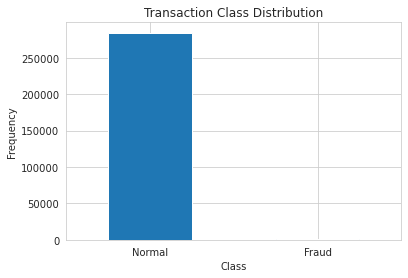%0A)

In \[8\]:

    data.Class.value_counts()

Out\[8\]:

    0    284315
    1       492
    Name: Class, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions
are non-fraud. If we use this dataframe as the base for our predictive
models and analysis we might get a lot of errors and our algorithms will
probably overfit since it will "assume" that most transactions are not
fraud. But we don't want our model to assume, we want our model to
detect patterns that give signs of fraud!

Determine the number of fraud and valid transactions in the entire
dataset.

In \[9\]:

    fraud = data[data['Class']==1]
    normal = data[data['Class']==0]

    print(f"Shape of Fraudulant transactions: {fraud.shape}")
    print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

    Shape of Fraudulant transactions: (492, 31)
    Shape of Non-Fraudulant transactions: (284315, 31)

How different are the amount of money used in different transaction
classes?

In \[10\]:

    pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

Out\[10\]:

|       | Amount  | Amount    |
|-------|---------|-----------|
| count | 492.00  | 284315.00 |
| mean  | 122.21  | 88.29     |
| std   | 256.68  | 250.11    |
| min   | 0.00    | 0.00      |
| 25%   | 1.00    | 5.65      |
| 50%   | 9.25    | 22.00     |
| 75%   | 105.89  | 77.05     |
| max   | 2125.87 | 25691.16  |

Do fraudulent transactions occur more often during certain time frame ?

In \[11\]:

    pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

Out\[11\]:

|       | Time      | Time      |
|-------|-----------|-----------|
| count | 492.00    | 284315.00 |
| mean  | 80746.81  | 94838.20  |
| std   | 47835.37  | 47484.02  |
| min   | 406.00    | 0.00      |
| 25%   | 41241.50  | 54230.00  |
| 50%   | 75568.50  | 84711.00  |
| 75%   | 128483.00 | 139333.00 |
| max   | 170348.00 | 172792.00 |

In \[12\]:

    # plot the time feature
    plt.figure(figsize=(14,10))

    plt.subplot(2, 2, 1)
    plt.title('Time Distribution (Seconds)')

    sns.displot(data['Time'], color='blue');

    #plot the amount feature
    plt.subplot(2, 2, 2)
    plt.title('Distribution of Amount')
    sns.displot(data['Amount'],color='blue');

![](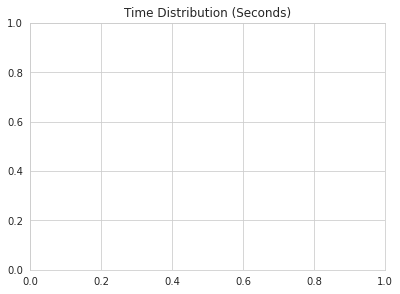%0A)

![](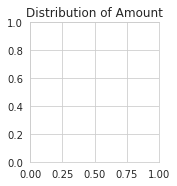%0A)

![](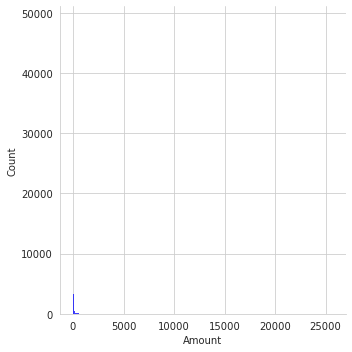%0A)

In \[13\]:

    # data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
    plt.figure(figsize=(14, 12))

    plt.subplot(2, 2, 1)
    data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
    plt.legend()

    plt.subplot(2, 2, 2)
    data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
    plt.legend()

Out\[13\]:

    <matplotlib.legend.Legend at 0x7f192c8fc4d0>

![](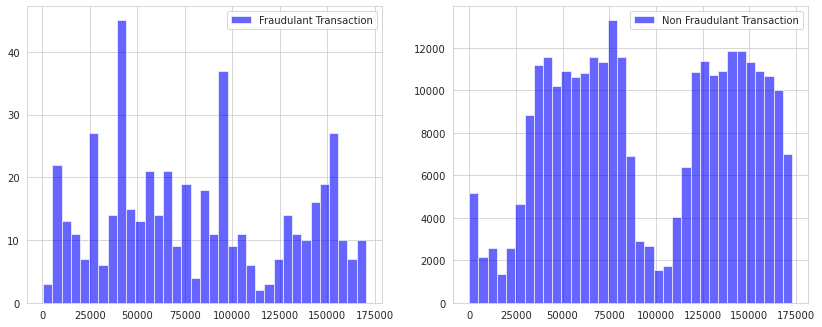%0A)

By seeing the distributions we can have an idea how skewed are these
features, we can also see further distributions of the other features.
There are techniques that can help the distributions be less skewed
which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per
above observation. Now let us take a sample of the dataset for out
modelling and prediction

In \[14\]:

    # heatmap to find any high correlations

    plt.figure(figsize=(10,10))
    sns.heatmap(data=data.corr(), cmap="seismic")
    plt.show();

![](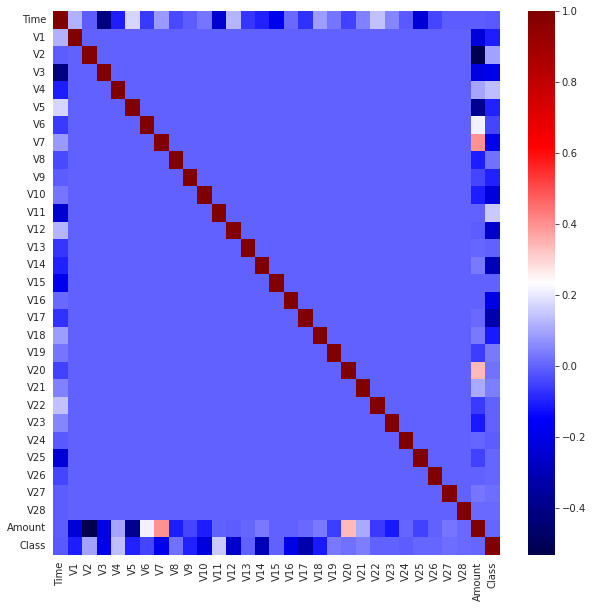%0A)

### Highest correlations come from:<a href="#Highest-correlations-come-from:" class="anchor-link">¶</a>

    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

-   While these correlations are high, I don't expect it to run the risk
    of multicollinearity.

-   The correlation matrix shows also that none of the V1 to V28 PCA
    components have any correlation to each other however if we observe
    Class has some form positive and negative correlations with the V
    components but has no correlation with Time and Amount.

# 3. Data Pre-processing<a href="#3.-Data-Pre-processing" class="anchor-link">¶</a>

`Time` and `Amount` should be scaled as the other columns.

In \[15\]:

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    scalar = StandardScaler()

    X = data.drop('Class', axis=1)
    y = data.Class

    X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                        test_size=0.3, random_state=42)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                                test_size=0.2, random_state=42)

    X_train = scalar.fit_transform(X_train)
    X_validate = scalar.transform(X_validate)
    X_test = scalar.transform(X_test)

    w_p = y_train.value_counts()[0] / len(y_train)
    w_n = y_train.value_counts()[1] / len(y_train)

    print(f"Fraudulant transaction weight: {w_n}")
    print(f"Non-Fraudulant transaction weight: {w_p}")

    Fraudulant transaction weight: 0.0017994745785028623
    Non-Fraudulant transaction weight: 0.9982005254214972

In \[16\]:

    print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
    print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
    print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

    TRAINING: X_train: (159491, 30), y_train: (159491,)
    _______________________________________________________
    VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
    __________________________________________________
    TESTING: X_test: (85443, 30), y_test: (85443,)

In \[17\]:

    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

    def print_score(label, prediction, train=True):
        if train:
            clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
            print("Train Result:\n================================================")
            print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
            print("_______________________________________________")
            print(f"Classification Report:\n{clf_report}")
            print("_______________________________________________")
            print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
            
        elif train==False:
            clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
            print("Test Result:\n================================================")        
            print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
            print("_______________________________________________")
            print(f"Classification Report:\n{clf_report}")
            print("_______________________________________________")
            print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# 4. Model Building<a href="#4.-Model-Building" class="anchor-link">¶</a>

# 4. 1. Artificial Neural Network (ANNs)<a href="#4.-1.-Artificial-Neural-Network-(ANNs)" class="anchor-link">¶</a>

In \[18\]:

    from tensorflow import keras

    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.summary()

    2023-01-31 13:06:24.462665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:24.546901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:24.547884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 256)               7936      
    _________________________________________________________________
    batch_normalization (BatchNo (None, 256)               1024      
    _________________________________________________________________
    dropout (Dropout)            (None, 256)               0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 256)               65792     
    _________________________________________________________________
    batch_normalization_1 (Batch (None, 256)               1024      
    _________________________________________________________________
    dropout_1 (Dropout)          (None, 256)               0         
    _________________________________________________________________
    dense_2 (Dense)              (None, 256)               65792     
    _________________________________________________________________
    batch_normalization_2 (Batch (None, 256)               1024      
    _________________________________________________________________
    dropout_2 (Dropout)          (None, 256)               0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 1)                 257       
    =================================================================
    Total params: 142,849
    Trainable params: 141,313
    Non-trainable params: 1,536
    _________________________________________________________________

    2023-01-31 13:06:24.550490: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
    To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
    2023-01-31 13:06:24.550889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:24.551843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:24.552739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:26.589708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:26.590598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:26.591271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
    2023-01-31 13:06:26.591879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15401 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

In \[19\]:

    METRICS = [
    #     keras.metrics.Accuracy(name='accuracy'),
        keras.metrics.FalseNegatives(name='fn'),
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.TrueNegatives(name='tn'),
        keras.metrics.TruePositives(name='tp'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

    model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

    callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
    class_weight = {0:w_p, 1:w_n}

    r = model.fit(
        X_train, y_train, 
        validation_data=(X_validate, y_validate),
        batch_size=2048, 
        epochs=300, 
    #     class_weight=class_weight,
        callbacks=callbacks,
    )

    2023-01-31 13:06:27.232878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)

    Epoch 1/300
    78/78 [==============================] - 4s 16ms/step - loss: 0.8085 - fn: 67.0000 - fp: 74009.0000 - tn: 85195.0000 - tp: 220.0000 - precision: 0.0030 - recall: 0.7666 - val_loss: 0.6696 - val_fn: 10.0000 - val_fp: 11186.0000 - val_tn: 28618.0000 - val_tp: 59.0000 - val_precision: 0.0052 - val_recall: 0.8551
    Epoch 2/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.6911 - fn: 46.0000 - fp: 61483.0000 - tn: 97721.0000 - tp: 241.0000 - precision: 0.0039 - recall: 0.8397 - val_loss: 0.6022 - val_fn: 11.0000 - val_fp: 3361.0000 - val_tn: 36443.0000 - val_tp: 58.0000 - val_precision: 0.0170 - val_recall: 0.8406
    Epoch 3/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.6106 - fn: 44.0000 - fp: 48116.0000 - tn: 111088.0000 - tp: 243.0000 - precision: 0.0050 - recall: 0.8467 - val_loss: 0.5320 - val_fn: 12.0000 - val_fp: 811.0000 - val_tn: 38993.0000 - val_tp: 57.0000 - val_precision: 0.0657 - val_recall: 0.8261
    Epoch 4/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.5400 - fn: 43.0000 - fp: 35307.0000 - tn: 123897.0000 - tp: 244.0000 - precision: 0.0069 - recall: 0.8502 - val_loss: 0.4586 - val_fn: 12.0000 - val_fp: 265.0000 - val_tn: 39539.0000 - val_tp: 57.0000 - val_precision: 0.1770 - val_recall: 0.8261
    Epoch 5/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.4765 - fn: 50.0000 - fp: 24058.0000 - tn: 135146.0000 - tp: 237.0000 - precision: 0.0098 - recall: 0.8258 - val_loss: 0.4135 - val_fn: 13.0000 - val_fp: 48.0000 - val_tn: 39756.0000 - val_tp: 56.0000 - val_precision: 0.5385 - val_recall: 0.8116
    Epoch 6/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.4143 - fn: 55.0000 - fp: 15307.0000 - tn: 143897.0000 - tp: 232.0000 - precision: 0.0149 - recall: 0.8084 - val_loss: 0.3537 - val_fn: 13.0000 - val_fp: 19.0000 - val_tn: 39785.0000 - val_tp: 56.0000 - val_precision: 0.7467 - val_recall: 0.8116
    Epoch 7/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.3550 - fn: 53.0000 - fp: 9086.0000 - tn: 150118.0000 - tp: 234.0000 - precision: 0.0251 - recall: 0.8153 - val_loss: 0.2944 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 8/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.2995 - fn: 56.0000 - fp: 5279.0000 - tn: 153925.0000 - tp: 231.0000 - precision: 0.0419 - recall: 0.8049 - val_loss: 0.2444 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 9/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.2481 - fn: 62.0000 - fp: 3153.0000 - tn: 156051.0000 - tp: 225.0000 - precision: 0.0666 - recall: 0.7840 - val_loss: 0.2115 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 10/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.2089 - fn: 62.0000 - fp: 1943.0000 - tn: 157261.0000 - tp: 225.0000 - precision: 0.1038 - recall: 0.7840 - val_loss: 0.1781 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 11/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.1756 - fn: 79.0000 - fp: 1316.0000 - tn: 157888.0000 - tp: 208.0000 - precision: 0.1365 - recall: 0.7247 - val_loss: 0.1499 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 12/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.1460 - fn: 96.0000 - fp: 826.0000 - tn: 158378.0000 - tp: 191.0000 - precision: 0.1878 - recall: 0.6655 - val_loss: 0.1181 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 13/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.1265 - fn: 87.0000 - fp: 719.0000 - tn: 158485.0000 - tp: 200.0000 - precision: 0.2176 - recall: 0.6969 - val_loss: 0.1056 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 14/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.1058 - fn: 87.0000 - fp: 528.0000 - tn: 158676.0000 - tp: 200.0000 - precision: 0.2747 - recall: 0.6969 - val_loss: 0.0922 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 15/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0940 - fn: 97.0000 - fp: 455.0000 - tn: 158749.0000 - tp: 190.0000 - precision: 0.2946 - recall: 0.6620 - val_loss: 0.0775 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 16/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0786 - fn: 91.0000 - fp: 340.0000 - tn: 158864.0000 - tp: 196.0000 - precision: 0.3657 - recall: 0.6829 - val_loss: 0.0652 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 17/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0686 - fn: 100.0000 - fp: 274.0000 - tn: 158930.0000 - tp: 187.0000 - precision: 0.4056 - recall: 0.6516 - val_loss: 0.0577 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 18/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0592 - fn: 94.0000 - fp: 256.0000 - tn: 158948.0000 - tp: 193.0000 - precision: 0.4298 - recall: 0.6725 - val_loss: 0.0528 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 19/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0537 - fn: 90.0000 - fp: 226.0000 - tn: 158978.0000 - tp: 197.0000 - precision: 0.4657 - recall: 0.6864 - val_loss: 0.0465 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 20/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0488 - fn: 99.0000 - fp: 200.0000 - tn: 159004.0000 - tp: 188.0000 - precision: 0.4845 - recall: 0.6551 - val_loss: 0.0425 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 21/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0443 - fn: 94.0000 - fp: 159.0000 - tn: 159045.0000 - tp: 193.0000 - precision: 0.5483 - recall: 0.6725 - val_loss: 0.0406 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 22/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.0403 - fn: 88.0000 - fp: 183.0000 - tn: 159021.0000 - tp: 199.0000 - precision: 0.5209 - recall: 0.6934 - val_loss: 0.0357 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 23/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0366 - fn: 97.0000 - fp: 142.0000 - tn: 159062.0000 - tp: 190.0000 - precision: 0.5723 - recall: 0.6620 - val_loss: 0.0323 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 24/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0341 - fn: 96.0000 - fp: 139.0000 - tn: 159065.0000 - tp: 191.0000 - precision: 0.5788 - recall: 0.6655 - val_loss: 0.0304 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 25/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0339 - fn: 110.0000 - fp: 130.0000 - tn: 159074.0000 - tp: 177.0000 - precision: 0.5765 - recall: 0.6167 - val_loss: 0.0298 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 26/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0295 - fn: 86.0000 - fp: 98.0000 - tn: 159106.0000 - tp: 201.0000 - precision: 0.6722 - recall: 0.7003 - val_loss: 0.0269 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 27/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0285 - fn: 98.0000 - fp: 107.0000 - tn: 159097.0000 - tp: 189.0000 - precision: 0.6385 - recall: 0.6585 - val_loss: 0.0269 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 28/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0266 - fn: 97.0000 - fp: 97.0000 - tn: 159107.0000 - tp: 190.0000 - precision: 0.6620 - recall: 0.6620 - val_loss: 0.0242 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 29/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0228 - fn: 82.0000 - fp: 107.0000 - tn: 159097.0000 - tp: 205.0000 - precision: 0.6571 - recall: 0.7143 - val_loss: 0.0216 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 30/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0226 - fn: 98.0000 - fp: 81.0000 - tn: 159123.0000 - tp: 189.0000 - precision: 0.7000 - recall: 0.6585 - val_loss: 0.0207 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 31/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0222 - fn: 100.0000 - fp: 87.0000 - tn: 159117.0000 - tp: 187.0000 - precision: 0.6825 - recall: 0.6516 - val_loss: 0.0206 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 32/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0205 - fn: 87.0000 - fp: 80.0000 - tn: 159124.0000 - tp: 200.0000 - precision: 0.7143 - recall: 0.6969 - val_loss: 0.0180 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 33/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0196 - fn: 107.0000 - fp: 85.0000 - tn: 159119.0000 - tp: 180.0000 - precision: 0.6792 - recall: 0.6272 - val_loss: 0.0197 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 34/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0193 - fn: 98.0000 - fp: 80.0000 - tn: 159124.0000 - tp: 189.0000 - precision: 0.7026 - recall: 0.6585 - val_loss: 0.0202 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 35/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0175 - fn: 86.0000 - fp: 69.0000 - tn: 159135.0000 - tp: 201.0000 - precision: 0.7444 - recall: 0.7003 - val_loss: 0.0186 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 36/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0173 - fn: 84.0000 - fp: 72.0000 - tn: 159132.0000 - tp: 203.0000 - precision: 0.7382 - recall: 0.7073 - val_loss: 0.0154 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 37/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0173 - fn: 92.0000 - fp: 69.0000 - tn: 159135.0000 - tp: 195.0000 - precision: 0.7386 - recall: 0.6794 - val_loss: 0.0149 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 38/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0167 - fn: 98.0000 - fp: 65.0000 - tn: 159139.0000 - tp: 189.0000 - precision: 0.7441 - recall: 0.6585 - val_loss: 0.0148 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 39/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0148 - fn: 97.0000 - fp: 67.0000 - tn: 159137.0000 - tp: 190.0000 - precision: 0.7393 - recall: 0.6620 - val_loss: 0.0145 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 40/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0145 - fn: 100.0000 - fp: 63.0000 - tn: 159141.0000 - tp: 187.0000 - precision: 0.7480 - recall: 0.6516 - val_loss: 0.0143 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 41/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0138 - fn: 85.0000 - fp: 51.0000 - tn: 159153.0000 - tp: 202.0000 - precision: 0.7984 - recall: 0.7038 - val_loss: 0.0130 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
    Epoch 42/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0127 - fn: 88.0000 - fp: 48.0000 - tn: 159156.0000 - tp: 199.0000 - precision: 0.8057 - recall: 0.6934 - val_loss: 0.0139 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 43/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0141 - fn: 89.0000 - fp: 52.0000 - tn: 159152.0000 - tp: 198.0000 - precision: 0.7920 - recall: 0.6899 - val_loss: 0.0109 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 44/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0115 - fn: 95.0000 - fp: 46.0000 - tn: 159158.0000 - tp: 192.0000 - precision: 0.8067 - recall: 0.6690 - val_loss: 0.0118 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 45/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0127 - fn: 88.0000 - fp: 64.0000 - tn: 159140.0000 - tp: 199.0000 - precision: 0.7567 - recall: 0.6934 - val_loss: 0.0114 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 46/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0124 - fn: 89.0000 - fp: 49.0000 - tn: 159155.0000 - tp: 198.0000 - precision: 0.8016 - recall: 0.6899 - val_loss: 0.0114 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 47/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0110 - fn: 87.0000 - fp: 55.0000 - tn: 159149.0000 - tp: 200.0000 - precision: 0.7843 - recall: 0.6969 - val_loss: 0.0096 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
    Epoch 48/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0112 - fn: 98.0000 - fp: 41.0000 - tn: 159163.0000 - tp: 189.0000 - precision: 0.8217 - recall: 0.6585 - val_loss: 0.0112 - val_fn: 12.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 57.0000 - val_precision: 0.8028 - val_recall: 0.8261
    Epoch 49/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0105 - fn: 92.0000 - fp: 49.0000 - tn: 159155.0000 - tp: 195.0000 - precision: 0.7992 - recall: 0.6794 - val_loss: 0.0113 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 50/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0101 - fn: 84.0000 - fp: 48.0000 - tn: 159156.0000 - tp: 203.0000 - precision: 0.8088 - recall: 0.7073 - val_loss: 0.0098 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
    Epoch 51/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0103 - fn: 90.0000 - fp: 57.0000 - tn: 159147.0000 - tp: 197.0000 - precision: 0.7756 - recall: 0.6864 - val_loss: 0.0104 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
    Epoch 52/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0094 - fn: 87.0000 - fp: 47.0000 - tn: 159157.0000 - tp: 200.0000 - precision: 0.8097 - recall: 0.6969 - val_loss: 0.0084 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 53/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0089 - fn: 82.0000 - fp: 52.0000 - tn: 159152.0000 - tp: 205.0000 - precision: 0.7977 - recall: 0.7143 - val_loss: 0.0074 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 54/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0093 - fn: 102.0000 - fp: 48.0000 - tn: 159156.0000 - tp: 185.0000 - precision: 0.7940 - recall: 0.6446 - val_loss: 0.0081 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 55/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0086 - fn: 93.0000 - fp: 44.0000 - tn: 159160.0000 - tp: 194.0000 - precision: 0.8151 - recall: 0.6760 - val_loss: 0.0069 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 56/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0081 - fn: 86.0000 - fp: 41.0000 - tn: 159163.0000 - tp: 201.0000 - precision: 0.8306 - recall: 0.7003 - val_loss: 0.0062 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
    Epoch 57/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0079 - fn: 96.0000 - fp: 41.0000 - tn: 159163.0000 - tp: 191.0000 - precision: 0.8233 - recall: 0.6655 - val_loss: 0.0068 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 58/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0079 - fn: 81.0000 - fp: 43.0000 - tn: 159161.0000 - tp: 206.0000 - precision: 0.8273 - recall: 0.7178 - val_loss: 0.0070 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 59/300
    78/78 [==============================] - 1s 10ms/step - loss: 0.0067 - fn: 87.0000 - fp: 45.0000 - tn: 159159.0000 - tp: 200.0000 - precision: 0.8163 - recall: 0.6969 - val_loss: 0.0060 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
    Epoch 60/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0072 - fn: 96.0000 - fp: 32.0000 - tn: 159172.0000 - tp: 191.0000 - precision: 0.8565 - recall: 0.6655 - val_loss: 0.0072 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
    Epoch 61/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0070 - fn: 88.0000 - fp: 37.0000 - tn: 159167.0000 - tp: 199.0000 - precision: 0.8432 - recall: 0.6934 - val_loss: 0.0063 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
    Epoch 62/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0063 - fn: 83.0000 - fp: 41.0000 - tn: 159163.0000 - tp: 204.0000 - precision: 0.8327 - recall: 0.7108 - val_loss: 0.0061 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
    Epoch 63/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0065 - fn: 82.0000 - fp: 35.0000 - tn: 159169.0000 - tp: 205.0000 - precision: 0.8542 - recall: 0.7143 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
    Epoch 64/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0065 - fn: 86.0000 - fp: 34.0000 - tn: 159170.0000 - tp: 201.0000 - precision: 0.8553 - recall: 0.7003 - val_loss: 0.0064 - val_fn: 14.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 55.0000 - val_precision: 0.8088 - val_recall: 0.7971
    Epoch 65/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0058 - fn: 87.0000 - fp: 34.0000 - tn: 159170.0000 - tp: 200.0000 - precision: 0.8547 - recall: 0.6969 - val_loss: 0.0065 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 66/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0058 - fn: 79.0000 - fp: 33.0000 - tn: 159171.0000 - tp: 208.0000 - precision: 0.8631 - recall: 0.7247 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 67/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0054 - fn: 87.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 200.0000 - precision: 0.8889 - recall: 0.6969 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 68/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.0056 - fn: 86.0000 - fp: 35.0000 - tn: 159169.0000 - tp: 201.0000 - precision: 0.8517 - recall: 0.7003 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 69/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0051 - fn: 81.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 206.0000 - precision: 0.8918 - recall: 0.7178 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 70/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0052 - fn: 90.0000 - fp: 32.0000 - tn: 159172.0000 - tp: 197.0000 - precision: 0.8603 - recall: 0.6864 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
    Epoch 71/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0052 - fn: 79.0000 - fp: 31.0000 - tn: 159173.0000 - tp: 208.0000 - precision: 0.8703 - recall: 0.7247 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 72/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0050 - fn: 81.0000 - fp: 26.0000 - tn: 159178.0000 - tp: 206.0000 - precision: 0.8879 - recall: 0.7178 - val_loss: 0.0061 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
    Epoch 73/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0048 - fn: 81.0000 - fp: 30.0000 - tn: 159174.0000 - tp: 206.0000 - precision: 0.8729 - recall: 0.7178 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 74/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0047 - fn: 84.0000 - fp: 30.0000 - tn: 159174.0000 - tp: 203.0000 - precision: 0.8712 - recall: 0.7073 - val_loss: 0.0050 - val_fn: 16.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 53.0000 - val_precision: 0.8281 - val_recall: 0.7681
    Epoch 75/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0050 - fn: 92.0000 - fp: 28.0000 - tn: 159176.0000 - tp: 195.0000 - precision: 0.8744 - recall: 0.6794 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
    Epoch 76/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0042 - fn: 84.0000 - fp: 32.0000 - tn: 159172.0000 - tp: 203.0000 - precision: 0.8638 - recall: 0.7073 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 77/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0046 - fn: 82.0000 - fp: 27.0000 - tn: 159177.0000 - tp: 205.0000 - precision: 0.8836 - recall: 0.7143 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 78/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0047 - fn: 85.0000 - fp: 29.0000 - tn: 159175.0000 - tp: 202.0000 - precision: 0.8745 - recall: 0.7038 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 79/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0045 - fn: 86.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 201.0000 - precision: 0.8973 - recall: 0.7003 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 80/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0046 - fn: 81.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 206.0000 - precision: 0.8996 - recall: 0.7178 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
    Epoch 81/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0040 - fn: 76.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 211.0000 - precision: 0.8941 - recall: 0.7352 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 82/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0042 - fn: 79.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 208.0000 - precision: 0.8927 - recall: 0.7247 - val_loss: 0.0050 - val_fn: 16.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.7681
    Epoch 83/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0040 - fn: 84.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 203.0000 - precision: 0.8904 - recall: 0.7073 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 84/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0041 - fn: 81.0000 - fp: 29.0000 - tn: 159175.0000 - tp: 206.0000 - precision: 0.8766 - recall: 0.7178 - val_loss: 0.0047 - val_fn: 17.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 52.0000 - val_precision: 0.8667 - val_recall: 0.7536
    Epoch 85/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0039 - fn: 80.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 207.0000 - precision: 0.9039 - recall: 0.7213 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 86/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0039 - fn: 85.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 202.0000 - precision: 0.9140 - recall: 0.7038 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 87/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0038 - fn: 74.0000 - fp: 28.0000 - tn: 159176.0000 - tp: 213.0000 - precision: 0.8838 - recall: 0.7422 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 88/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0040 - fn: 81.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 206.0000 - precision: 0.9035 - recall: 0.7178 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 89/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0035 - fn: 75.0000 - fp: 30.0000 - tn: 159174.0000 - tp: 212.0000 - precision: 0.8760 - recall: 0.7387 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 90/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0041 - fn: 81.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 206.0000 - precision: 0.9075 - recall: 0.7178 - val_loss: 0.0048 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 91/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0038 - fn: 78.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 209.0000 - precision: 0.9009 - recall: 0.7282 - val_loss: 0.0045 - val_fn: 18.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 51.0000 - val_precision: 0.9107 - val_recall: 0.7391
    Epoch 92/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0035 - fn: 82.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 205.0000 - precision: 0.8913 - recall: 0.7143 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 93/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0035 - fn: 77.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 210.0000 - precision: 0.9211 - recall: 0.7317 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 94/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0035 - fn: 75.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 212.0000 - precision: 0.9060 - recall: 0.7387 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 95/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0034 - fn: 73.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 214.0000 - precision: 0.9068 - recall: 0.7456 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 96/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0032 - fn: 71.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 216.0000 - precision: 0.9153 - recall: 0.7526 - val_loss: 0.0045 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
    Epoch 97/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0034 - fn: 80.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 207.0000 - precision: 0.9119 - recall: 0.7213 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 98/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0033 - fn: 69.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 218.0000 - precision: 0.9237 - recall: 0.7596 - val_loss: 0.0048 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 99/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0032 - fn: 75.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 212.0000 - precision: 0.9138 - recall: 0.7387 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 100/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0031 - fn: 69.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 218.0000 - precision: 0.9046 - recall: 0.7596 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 54.0000 - val_precision: 0.8571 - val_recall: 0.7826
    Epoch 101/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0036 - fn: 80.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 207.0000 - precision: 0.9200 - recall: 0.7213 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 102/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0031 - fn: 75.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 212.0000 - precision: 0.8983 - recall: 0.7387 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 103/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0032 - fn: 70.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 217.0000 - precision: 0.9004 - recall: 0.7561 - val_loss: 0.0045 - val_fn: 16.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 53.0000 - val_precision: 0.8833 - val_recall: 0.7681
    Epoch 104/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0032 - fn: 77.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 210.0000 - precision: 0.9292 - recall: 0.7317 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 105/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0029 - fn: 68.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 219.0000 - precision: 0.9319 - recall: 0.7631 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 106/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0031 - fn: 76.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 211.0000 - precision: 0.9017 - recall: 0.7352 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 107/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0032 - fn: 74.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 213.0000 - precision: 0.9025 - recall: 0.7422 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 108/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0031 - fn: 68.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 219.0000 - precision: 0.9163 - recall: 0.7631 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 109/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0028 - fn: 67.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 220.0000 - precision: 0.9322 - recall: 0.7666 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 110/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0030 - fn: 72.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 215.0000 - precision: 0.9430 - recall: 0.7491 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 111/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0031 - fn: 69.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 218.0000 - precision: 0.9121 - recall: 0.7596 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 112/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0029 - fn: 69.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 218.0000 - precision: 0.9198 - recall: 0.7596 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 113/300
    78/78 [==============================] - 1s 13ms/step - loss: 0.0027 - fn: 66.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 221.0000 - precision: 0.9170 - recall: 0.7700 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 114/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.0029 - fn: 73.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 214.0000 - precision: 0.9224 - recall: 0.7456 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 115/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0030 - fn: 72.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 215.0000 - precision: 0.8958 - recall: 0.7491 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 116/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0029 - fn: 76.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 211.0000 - precision: 0.9336 - recall: 0.7352 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 117/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0029 - fn: 72.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 215.0000 - precision: 0.9267 - recall: 0.7491 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 118/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0027 - fn: 70.0000 - fp: 28.0000 - tn: 159176.0000 - tp: 217.0000 - precision: 0.8857 - recall: 0.7561 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 119/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0027 - fn: 67.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 220.0000 - precision: 0.9091 - recall: 0.7666 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 120/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0026 - fn: 74.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 213.0000 - precision: 0.9425 - recall: 0.7422 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 121/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0028 - fn: 65.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 222.0000 - precision: 0.9136 - recall: 0.7735 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 122/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.0025 - fn: 63.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 224.0000 - precision: 0.9218 - recall: 0.7805 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 123/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 65.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 222.0000 - precision: 0.9250 - recall: 0.7735 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 124/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0024 - fn: 69.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 218.0000 - precision: 0.9356 - recall: 0.7596 - val_loss: 0.0046 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 125/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 63.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 224.0000 - precision: 0.9106 - recall: 0.7805 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 126/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0024 - fn: 70.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 217.0000 - precision: 0.9274 - recall: 0.7561 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 127/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0027 - fn: 67.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 220.0000 - precision: 0.9244 - recall: 0.7666 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 128/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 67.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 220.0000 - precision: 0.9091 - recall: 0.7666 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 129/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 64.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 223.0000 - precision: 0.9292 - recall: 0.7770 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 130/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 58.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 229.0000 - precision: 0.9542 - recall: 0.7979 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 131/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0026 - fn: 64.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 223.0000 - precision: 0.9292 - recall: 0.7770 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 132/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0024 - fn: 64.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 223.0000 - precision: 0.9370 - recall: 0.7770 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 133/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0023 - fn: 63.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 224.0000 - precision: 0.9492 - recall: 0.7805 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 134/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0022 - fn: 61.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 226.0000 - precision: 0.9378 - recall: 0.7875 - val_loss: 0.0043 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 135/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 68.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 219.0000 - precision: 0.9319 - recall: 0.7631 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 136/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 60.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 227.0000 - precision: 0.9116 - recall: 0.7909 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 137/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0025 - fn: 64.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 223.0000 - precision: 0.9215 - recall: 0.7770 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 138/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0024 - fn: 68.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 219.0000 - precision: 0.9359 - recall: 0.7631 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 139/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0024 - fn: 66.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 221.0000 - precision: 0.9170 - recall: 0.7700 - val_loss: 0.0044 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
    Epoch 140/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0023 - fn: 62.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 225.0000 - precision: 0.9336 - recall: 0.7840 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 141/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 54.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 233.0000 - precision: 0.9433 - recall: 0.8118 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 142/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0021 - fn: 61.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 226.0000 - precision: 0.9617 - recall: 0.7875 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 143/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 57.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 230.0000 - precision: 0.9237 - recall: 0.8014 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 144/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 56.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 231.0000 - precision: 0.9467 - recall: 0.8049 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 145/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 60.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 227.0000 - precision: 0.9458 - recall: 0.7909 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 146/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0022 - fn: 62.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 225.0000 - precision: 0.9109 - recall: 0.7840 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 147/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 55.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 232.0000 - precision: 0.9393 - recall: 0.8084 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 148/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 60.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 227.0000 - precision: 0.9342 - recall: 0.7909 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 149/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0022 - fn: 61.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 226.0000 - precision: 0.9456 - recall: 0.7875 - val_loss: 0.0047 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 150/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 54.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 233.0000 - precision: 0.9246 - recall: 0.8118 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 151/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 60.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 227.0000 - precision: 0.9538 - recall: 0.7909 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 152/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 57.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 230.0000 - precision: 0.9274 - recall: 0.8014 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 153/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0021 - fn: 61.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 226.0000 - precision: 0.9262 - recall: 0.7875 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 154/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0020 - fn: 56.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 231.0000 - precision: 0.9545 - recall: 0.8049 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 155/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 59.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 228.0000 - precision: 0.9268 - recall: 0.7944 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 156/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 59.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 228.0000 - precision: 0.9661 - recall: 0.7944 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 157/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 55.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 232.0000 - precision: 0.9317 - recall: 0.8084 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 158/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0019 - fn: 55.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 232.0000 - precision: 0.9431 - recall: 0.8084 - val_loss: 0.0043 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 159/300
    78/78 [==============================] - 1s 14ms/step - loss: 0.0019 - fn: 59.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 228.0000 - precision: 0.9461 - recall: 0.7944 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 160/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0021 - fn: 57.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 230.0000 - precision: 0.9274 - recall: 0.8014 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 161/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 56.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 231.0000 - precision: 0.9506 - recall: 0.8049 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 162/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 53.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 234.0000 - precision: 0.9435 - recall: 0.8153 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 163/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 55.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 232.0000 - precision: 0.9098 - recall: 0.8084 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 164/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 61.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 226.0000 - precision: 0.9576 - recall: 0.7875 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 165/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0020 - fn: 57.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 230.0000 - precision: 0.9163 - recall: 0.8014 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 54.0000 - val_precision: 0.8571 - val_recall: 0.7826
    Epoch 166/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 55.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 232.0000 - precision: 0.9627 - recall: 0.8084 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 167/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 57.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 230.0000 - precision: 0.9465 - recall: 0.8014 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 168/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 49.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 238.0000 - precision: 0.9558 - recall: 0.8293 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 169/300
    78/78 [==============================] - 1s 10ms/step - loss: 0.0019 - fn: 57.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 230.0000 - precision: 0.9388 - recall: 0.8014 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 170/300
    78/78 [==============================] - 1s 10ms/step - loss: 0.0017 - fn: 57.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 230.0000 - precision: 0.9426 - recall: 0.8014 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 171/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 54.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 233.0000 - precision: 0.9173 - recall: 0.8118 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
    Epoch 172/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 55.0000 - fp: 23.0000 - tn: 159181.0000 - tp: 232.0000 - precision: 0.9098 - recall: 0.8084 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 173/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 51.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 236.0000 - precision: 0.9555 - recall: 0.8223 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 174/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 48.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 239.0000 - precision: 0.9598 - recall: 0.8328 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 175/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 50.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 237.0000 - precision: 0.9405 - recall: 0.8258 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 176/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0016 - fn: 50.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 237.0000 - precision: 0.9556 - recall: 0.8258 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 177/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0019 - fn: 52.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 235.0000 - precision: 0.9289 - recall: 0.8188 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 178/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 53.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 234.0000 - precision: 0.9286 - recall: 0.8153 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 179/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 49.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 238.0000 - precision: 0.9482 - recall: 0.8293 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 180/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0016 - fn: 45.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 242.0000 - precision: 0.9380 - recall: 0.8432 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 181/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 55.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 232.0000 - precision: 0.9393 - recall: 0.8084 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 182/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 51.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 236.0000 - precision: 0.9402 - recall: 0.8223 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 183/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0016 - fn: 54.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 233.0000 - precision: 0.9472 - recall: 0.8118 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 184/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 50.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 237.0000 - precision: 0.9294 - recall: 0.8258 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 185/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 47.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 240.0000 - precision: 0.9375 - recall: 0.8362 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 186/300
    78/78 [==============================] - 1s 10ms/step - loss: 0.0016 - fn: 51.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 236.0000 - precision: 0.9516 - recall: 0.8223 - val_loss: 0.0048 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 187/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 49.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 238.0000 - precision: 0.9444 - recall: 0.8293 - val_loss: 0.0048 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 188/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 52.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 235.0000 - precision: 0.9363 - recall: 0.8188 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 189/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 45.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 242.0000 - precision: 0.9344 - recall: 0.8432 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 190/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 52.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 235.0000 - precision: 0.9476 - recall: 0.8188 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 191/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 46.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 241.0000 - precision: 0.9377 - recall: 0.8397 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 192/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 42.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 245.0000 - precision: 0.9459 - recall: 0.8537 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 193/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0017 - fn: 51.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 236.0000 - precision: 0.9440 - recall: 0.8223 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 194/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0018 - fn: 53.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 234.0000 - precision: 0.9360 - recall: 0.8153 - val_loss: 0.0052 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
    Epoch 195/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 46.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 241.0000 - precision: 0.9377 - recall: 0.8397 - val_loss: 0.0051 - val_fn: 16.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 53.0000 - val_precision: 0.8833 - val_recall: 0.7681
    Epoch 196/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0016 - fn: 50.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 237.0000 - precision: 0.9442 - recall: 0.8258 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 197/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 43.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 244.0000 - precision: 0.9494 - recall: 0.8502 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 198/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 47.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 240.0000 - precision: 0.9486 - recall: 0.8362 - val_loss: 0.0052 - val_fn: 16.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 53.0000 - val_precision: 0.8833 - val_recall: 0.7681
    Epoch 199/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 49.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 238.0000 - precision: 0.9597 - recall: 0.8293 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 200/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 43.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 244.0000 - precision: 0.9494 - recall: 0.8502 - val_loss: 0.0052 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 201/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0017 - fn: 51.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 236.0000 - precision: 0.9291 - recall: 0.8223 - val_loss: 0.0051 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 202/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0014 - fn: 42.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 245.0000 - precision: 0.9423 - recall: 0.8537 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 203/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0015 - fn: 45.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 242.0000 - precision: 0.9416 - recall: 0.8432 - val_loss: 0.0049 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 204/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0016 - fn: 43.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 244.0000 - precision: 0.9421 - recall: 0.8502 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 205/300
    78/78 [==============================] - 1s 13ms/step - loss: 0.0014 - fn: 46.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 241.0000 - precision: 0.9526 - recall: 0.8397 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 206/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0013 - fn: 41.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 246.0000 - precision: 0.9535 - recall: 0.8571 - val_loss: 0.0051 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 207/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 41.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 246.0000 - precision: 0.9535 - recall: 0.8571 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
    Epoch 208/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 40.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 247.0000 - precision: 0.9537 - recall: 0.8606 - val_loss: 0.0050 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
    Epoch 209/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0017 - fn: 52.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 235.0000 - precision: 0.9363 - recall: 0.8188 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 210/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 41.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 246.0000 - precision: 0.9609 - recall: 0.8571 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 211/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 45.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 242.0000 - precision: 0.9380 - recall: 0.8432 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 212/300
    78/78 [==============================] - 1s 10ms/step - loss: 0.0013 - fn: 43.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 244.0000 - precision: 0.9494 - recall: 0.8502 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 213/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0014 - fn: 49.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 238.0000 - precision: 0.9636 - recall: 0.8293 - val_loss: 0.0052 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 214/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 37.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 250.0000 - precision: 0.9363 - recall: 0.8711 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 215/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 38.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 249.0000 - precision: 0.9614 - recall: 0.8676 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 216/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 47.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 240.0000 - precision: 0.9524 - recall: 0.8362 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 217/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0014 - fn: 38.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 249.0000 - precision: 0.9504 - recall: 0.8676 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 218/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0014 - fn: 50.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 237.0000 - precision: 0.9634 - recall: 0.8258 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 219/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 36.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 251.0000 - precision: 0.9401 - recall: 0.8746 - val_loss: 0.0051 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 220/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 44.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 243.0000 - precision: 0.9605 - recall: 0.8467 - val_loss: 0.0051 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 221/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 40.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 247.0000 - precision: 0.9251 - recall: 0.8606 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 222/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 42.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 245.0000 - precision: 0.9608 - recall: 0.8537 - val_loss: 0.0052 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 223/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 40.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 247.0000 - precision: 0.9724 - recall: 0.8606 - val_loss: 0.0052 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 224/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 44.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 243.0000 - precision: 0.9605 - recall: 0.8467 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 225/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 37.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 250.0000 - precision: 0.9470 - recall: 0.8711 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 226/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0012 - fn: 40.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 247.0000 - precision: 0.9574 - recall: 0.8606 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 227/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 40.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 247.0000 - precision: 0.9686 - recall: 0.8606 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 228/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 42.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 245.0000 - precision: 0.9423 - recall: 0.8537 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 229/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 41.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 246.0000 - precision: 0.9609 - recall: 0.8571 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 230/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0010 - fn: 34.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 253.0000 - precision: 0.9511 - recall: 0.8815 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 231/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 39.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 248.0000 - precision: 0.9650 - recall: 0.8641 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 232/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 46.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 241.0000 - precision: 0.9414 - recall: 0.8397 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 233/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0011 - fn: 41.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 246.0000 - precision: 0.9647 - recall: 0.8571 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 234/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0012 - fn: 36.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 251.0000 - precision: 0.9544 - recall: 0.8746 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 235/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 35.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 252.0000 - precision: 0.9582 - recall: 0.8780 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 236/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 42.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 245.0000 - precision: 0.9533 - recall: 0.8537 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 237/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0014 - fn: 44.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 243.0000 - precision: 0.9275 - recall: 0.8467 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
    Epoch 238/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 35.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 252.0000 - precision: 0.9403 - recall: 0.8780 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 239/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.2760e-04 - fn: 32.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 255.0000 - precision: 0.9515 - recall: 0.8885 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 240/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 45.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 242.0000 - precision: 0.9528 - recall: 0.8432 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 241/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 38.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 249.0000 - precision: 0.9468 - recall: 0.8676 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 242/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 36.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 251.0000 - precision: 0.9580 - recall: 0.8746 - val_loss: 0.0052 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 243/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 33.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 254.0000 - precision: 0.9585 - recall: 0.8850 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 244/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 36.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 251.0000 - precision: 0.9654 - recall: 0.8746 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 245/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 37.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 250.0000 - precision: 0.9398 - recall: 0.8711 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 246/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 34.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 253.0000 - precision: 0.9511 - recall: 0.8815 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 247/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0013 - fn: 44.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 243.0000 - precision: 0.9605 - recall: 0.8467 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 248/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.9896e-04 - fn: 31.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 256.0000 - precision: 0.9697 - recall: 0.8920 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 56.0000 - val_precision: 0.9180 - val_recall: 0.8116
    Epoch 249/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 32.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 255.0000 - precision: 0.9659 - recall: 0.8885 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 250/300
    78/78 [==============================] - 1s 12ms/step - loss: 0.0012 - fn: 36.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 251.0000 - precision: 0.9472 - recall: 0.8746 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 251/300
    78/78 [==============================] - 1s 15ms/step - loss: 0.0011 - fn: 37.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 250.0000 - precision: 0.9804 - recall: 0.8711 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 252/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0010 - fn: 36.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 251.0000 - precision: 0.9654 - recall: 0.8746 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 253/300
    78/78 [==============================] - 1s 7ms/step - loss: 9.4446e-04 - fn: 33.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 254.0000 - precision: 0.9658 - recall: 0.8850 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 254/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0012 - fn: 34.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 253.0000 - precision: 0.9547 - recall: 0.8815 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 255/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 35.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 252.0000 - precision: 0.9655 - recall: 0.8780 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 256/300
    78/78 [==============================] - 1s 9ms/step - loss: 0.0011 - fn: 42.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 245.0000 - precision: 0.9423 - recall: 0.8537 - val_loss: 0.0059 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 257/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 33.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 254.0000 - precision: 0.9585 - recall: 0.8850 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 258/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 35.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 252.0000 - precision: 0.9618 - recall: 0.8780 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 259/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0013 - fn: 38.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 249.0000 - precision: 0.9504 - recall: 0.8676 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 260/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.5809e-04 - fn: 31.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 256.0000 - precision: 0.9446 - recall: 0.8920 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 261/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.1218e-04 - fn: 35.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 252.0000 - precision: 0.9545 - recall: 0.8780 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 262/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.2606e-04 - fn: 31.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 256.0000 - precision: 0.9446 - recall: 0.8920 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 263/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.6674e-04 - fn: 35.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 252.0000 - precision: 0.9582 - recall: 0.8780 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 264/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.6555e-04 - fn: 31.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 256.0000 - precision: 0.9808 - recall: 0.8920 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 265/300
    78/78 [==============================] - 1s 11ms/step - loss: 0.0011 - fn: 38.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 249.0000 - precision: 0.9504 - recall: 0.8676 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 266/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 37.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 250.0000 - precision: 0.9434 - recall: 0.8711 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 267/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.2711e-04 - fn: 31.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 256.0000 - precision: 0.9446 - recall: 0.8920 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 268/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.8619e-04 - fn: 35.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 252.0000 - precision: 0.9618 - recall: 0.8780 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
    Epoch 269/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.4468e-04 - fn: 33.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 254.0000 - precision: 0.9549 - recall: 0.8850 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
    Epoch 270/300
    78/78 [==============================] - 1s 9ms/step - loss: 9.9157e-04 - fn: 35.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 252.0000 - precision: 0.9655 - recall: 0.8780 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 271/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.4199e-04 - fn: 33.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 254.0000 - precision: 0.9695 - recall: 0.8850 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 272/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.8711e-04 - fn: 33.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 254.0000 - precision: 0.9513 - recall: 0.8850 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 273/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.6316e-04 - fn: 31.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 256.0000 - precision: 0.9734 - recall: 0.8920 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 274/300
    78/78 [==============================] - 1s 7ms/step - loss: 0.0010 - fn: 34.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 253.0000 - precision: 0.9511 - recall: 0.8815 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 275/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - fn: 37.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 250.0000 - precision: 0.9653 - recall: 0.8711 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 276/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.2942e-04 - fn: 26.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 261.0000 - precision: 0.9596 - recall: 0.9094 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 277/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.9364e-04 - fn: 30.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 257.0000 - precision: 0.9554 - recall: 0.8955 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
    Epoch 278/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.2430e-04 - fn: 27.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 260.0000 - precision: 0.9665 - recall: 0.9059 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 279/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.3212e-04 - fn: 31.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 256.0000 - precision: 0.9624 - recall: 0.8920 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 280/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.0273e-04 - fn: 33.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 254.0000 - precision: 0.9585 - recall: 0.8850 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 281/300
    78/78 [==============================] - 1s 11ms/step - loss: 9.1780e-04 - fn: 32.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 255.0000 - precision: 0.9696 - recall: 0.8885 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 282/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 33.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 254.0000 - precision: 0.9442 - recall: 0.8850 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 283/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.4804e-04 - fn: 27.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 260.0000 - precision: 0.9701 - recall: 0.9059 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 284/300
    78/78 [==============================] - 1s 8ms/step - loss: 7.5618e-04 - fn: 29.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 258.0000 - precision: 0.9556 - recall: 0.8990 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 285/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.7475e-04 - fn: 32.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 255.0000 - precision: 0.9586 - recall: 0.8885 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 56.0000 - val_precision: 0.9180 - val_recall: 0.8116
    Epoch 286/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.5235e-04 - fn: 32.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 255.0000 - precision: 0.9623 - recall: 0.8885 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
    Epoch 287/300
    78/78 [==============================] - 1s 8ms/step - loss: 0.0010 - fn: 31.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 256.0000 - precision: 0.9660 - recall: 0.8920 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 288/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.2775e-04 - fn: 35.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 252.0000 - precision: 0.9730 - recall: 0.8780 - val_loss: 0.0056 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 289/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.9108e-04 - fn: 28.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 259.0000 - precision: 0.9283 - recall: 0.9024 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
    Epoch 290/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.9962e-04 - fn: 29.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 258.0000 - precision: 0.9556 - recall: 0.8990 - val_loss: 0.0059 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 291/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.6182e-04 - fn: 29.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 258.0000 - precision: 0.9591 - recall: 0.8990 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 292/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.9037e-04 - fn: 31.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 256.0000 - precision: 0.9588 - recall: 0.8920 - val_loss: 0.0062 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 293/300
    78/78 [==============================] - 1s 8ms/step - loss: 9.4903e-04 - fn: 25.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 262.0000 - precision: 0.9704 - recall: 0.9129 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 294/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.4817e-04 - fn: 28.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 259.0000 - precision: 0.9664 - recall: 0.9024 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 295/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.6136e-04 - fn: 29.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 258.0000 - precision: 0.9773 - recall: 0.8990 - val_loss: 0.0061 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
    Epoch 296/300
    78/78 [==============================] - 1s 8ms/step - loss: 8.2430e-04 - fn: 26.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 261.0000 - precision: 0.9596 - recall: 0.9094 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
    Epoch 297/300
    78/78 [==============================] - 1s 13ms/step - loss: 8.6465e-04 - fn: 29.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 258.0000 - precision: 0.9663 - recall: 0.8990 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 298/300
    78/78 [==============================] - 1s 12ms/step - loss: 8.4358e-04 - fn: 28.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 259.0000 - precision: 0.9593 - recall: 0.9024 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
    Epoch 299/300
    78/78 [==============================] - 1s 9ms/step - loss: 6.6086e-04 - fn: 23.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 264.0000 - precision: 0.9851 - recall: 0.9199 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
    Epoch 300/300
    78/78 [==============================] - 1s 10ms/step - loss: 8.7978e-04 - fn: 25.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 262.0000 - precision: 0.9776 - recall: 0.9129 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116

In \[20\]:

    score = model.evaluate(X_test, y_test)
    print(score)

    2671/2671 [==============================] - 12s 4ms/step - loss: 0.0040 - fn: 26.0000 - fp: 9.0000 - tn: 85298.0000 - tp: 110.0000 - precision: 0.9244 - recall: 0.8088
    [0.003994255792349577, 26.0, 9.0, 85298.0, 110.0, 0.924369752407074, 0.8088235259056091]

In \[21\]:

    plt.figure(figsize=(12, 16))

    plt.subplot(4, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss Function evolution during training')
    plt.legend()

    plt.subplot(4, 2, 2)
    plt.plot(r.history['fn'], label='fn')
    plt.plot(r.history['val_fn'], label='val_fn')
    plt.title('Accuracy evolution during training')
    plt.legend()

    plt.subplot(4, 2, 3)
    plt.plot(r.history['precision'], label='precision')
    plt.plot(r.history['val_precision'], label='val_precision')
    plt.title('Precision evolution during training')
    plt.legend()

    plt.subplot(4, 2, 4)
    plt.plot(r.history['recall'], label='recall')
    plt.plot(r.history['val_recall'], label='val_recall')
    plt.title('Recall evolution during training')
    plt.legend()

Out\[21\]:

    <matplotlib.legend.Legend at 0x7f1850564f10>

![](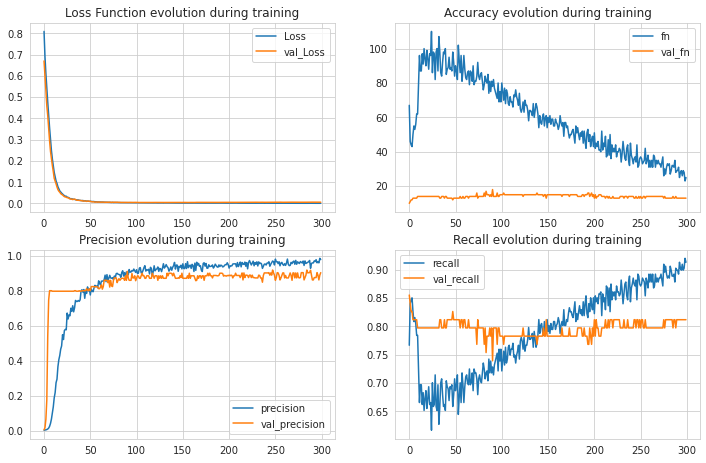%0A)

In \[22\]:

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print_score(y_train, y_train_pred.round(), train=True)
    print_score(y_test, y_test_pred.round(), train=False)

    scores_dict = {
        'ANNs': {
            'Train': f1_score(y_train, y_train_pred.round()),
            'Test': f1_score(y_test, y_test_pred.round()),
        },
    }

    Train Result:
    ================================================
    Accuracy Score: 99.99%
    _______________________________________________
    Classification Report:
                      0      1  accuracy  macro avg  weighted avg
    precision      1.00   1.00      1.00       1.00          1.00
    recall         1.00   0.95      1.00       0.98          1.00
    f1-score       1.00   0.97      1.00       0.99          1.00
    support   159204.00 287.00      1.00  159491.00     159491.00
    _______________________________________________
    Confusion Matrix: 
     [[159204      0]
     [    14    273]]

    Test Result:
    ================================================
    Accuracy Score: 99.96%
    _______________________________________________
    Classification Report:
                     0      1  accuracy  macro avg  weighted avg
    precision     1.00   0.92      1.00       0.96          1.00
    recall        1.00   0.81      1.00       0.90          1.00
    f1-score      1.00   0.86      1.00       0.93          1.00
    support   85307.00 136.00      1.00   85443.00      85443.00
    _______________________________________________
    Confusion Matrix: 
     [[85298     9]
     [   26   110]]

# 4. 2. XGBoost<a href="#4.-2.-XGBoost" class="anchor-link">¶</a>

In \[23\]:

    from xgboost import XGBClassifier

    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

    y_train_pred = xgb_clf.predict(X_train)
    y_test_pred = xgb_clf.predict(X_test)

    print_score(y_train, y_train_pred, train=True)
    print_score(y_test, y_test_pred, train=False)

    scores_dict['XGBoost'] = {
            'Train': f1_score(y_train,y_train_pred),
            'Test': f1_score(y_test, y_test_pred),
    }

    /opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
      UserWarning,

    Train Result:
    ================================================
    Accuracy Score: 100.00%
    _______________________________________________
    Classification Report:
                      0      1  accuracy  macro avg  weighted avg
    precision      1.00   1.00      1.00       1.00          1.00
    recall         1.00   1.00      1.00       1.00          1.00
    f1-score       1.00   1.00      1.00       1.00          1.00
    support   159204.00 287.00      1.00  159491.00     159491.00
    _______________________________________________
    Confusion Matrix: 
     [[159204      0]
     [     0    287]]

    Test Result:
    ================================================
    Accuracy Score: 99.96%
    _______________________________________________
    Classification Report:
                     0      1  accuracy  macro avg  weighted avg
    precision     1.00   0.95      1.00       0.97          1.00
    recall        1.00   0.82      1.00       0.91          1.00
    f1-score      1.00   0.88      1.00       0.94          1.00
    support   85307.00 136.00      1.00   85443.00      85443.00
    _______________________________________________
    Confusion Matrix: 
     [[85301     6]
     [   25   111]]

# 4. 3. Random Forest<a href="#4.-3.-Random-Forest" class="anchor-link">¶</a>

In \[24\]:

    from sklearn.ensemble import RandomForestClassifier

    rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
    rf_clf.fit(X_train, y_train)

    y_train_pred = rf_clf.predict(X_train)
    y_test_pred = rf_clf.predict(X_test)

    print_score(y_train, y_train_pred, train=True)
    print_score(y_test, y_test_pred, train=False)

    scores_dict['Random Forest'] = {
            'Train': f1_score(y_train,y_train_pred),
            'Test': f1_score(y_test, y_test_pred),
    }

    Train Result:
    ================================================
    Accuracy Score: 100.00%
    _______________________________________________
    Classification Report:
                      0      1  accuracy  macro avg  weighted avg
    precision      1.00   1.00      1.00       1.00          1.00
    recall         1.00   1.00      1.00       1.00          1.00
    f1-score       1.00   1.00      1.00       1.00          1.00
    support   159204.00 287.00      1.00  159491.00     159491.00
    _______________________________________________
    Confusion Matrix: 
     [[159204      0]
     [     0    287]]

    Test Result:
    ================================================
    Accuracy Score: 99.96%
    _______________________________________________
    Classification Report:
                     0      1  accuracy  macro avg  weighted avg
    precision     1.00   0.91      1.00       0.95          1.00
    recall        1.00   0.82      1.00       0.91          1.00
    f1-score      1.00   0.86      1.00       0.93          1.00
    support   85307.00 136.00      1.00   85443.00      85443.00
    _______________________________________________
    Confusion Matrix: 
     [[85296    11]
     [   25   111]]

# 4. 4. CatBoost<a href="#4.-4.-CatBoost" class="anchor-link">¶</a>

In \[25\]:

    from catboost import CatBoostClassifier

    cb_clf = CatBoostClassifier()
    cb_clf.fit(X_train, y_train)

    Learning rate set to 0.089847
    0:  learn: 0.3915001    total: 114ms    remaining: 1m 53s
    1:  learn: 0.2368380    total: 169ms    remaining: 1m 24s
    2:  learn: 0.1341782    total: 226ms    remaining: 1m 15s
    3:  learn: 0.0788507    total: 276ms    remaining: 1m 8s
    4:  learn: 0.0482949    total: 325ms    remaining: 1m 4s
    5:  learn: 0.0315326    total: 373ms    remaining: 1m 1s
    6:  learn: 0.0213628    total: 424ms    remaining: 1m
    7:  learn: 0.0153604    total: 478ms    remaining: 59.3s
    8:  learn: 0.0115137    total: 526ms    remaining: 57.9s
    9:  learn: 0.0090128    total: 573ms    remaining: 56.7s
    10: learn: 0.0071549    total: 620ms    remaining: 55.7s
    11: learn: 0.0060639    total: 668ms    remaining: 55s
    12: learn: 0.0052454    total: 723ms    remaining: 54.9s
    13: learn: 0.0046540    total: 771ms    remaining: 54.3s
    14: learn: 0.0042228    total: 820ms    remaining: 53.8s
    15: learn: 0.0038779    total: 872ms    remaining: 53.6s
    16: learn: 0.0036112    total: 917ms    remaining: 53s
    17: learn: 0.0034151    total: 964ms    remaining: 52.6s
    18: learn: 0.0032510    total: 1.01s    remaining: 52.1s
    19: learn: 0.0031177    total: 1.06s    remaining: 52s
    20: learn: 0.0030015    total: 1.11s    remaining: 51.8s
    21: learn: 0.0029212    total: 1.16s    remaining: 51.3s
    22: learn: 0.0028291    total: 1.2s remaining: 51.1s
    23: learn: 0.0027727    total: 1.25s    remaining: 50.8s
    24: learn: 0.0027228    total: 1.3s remaining: 50.8s
    25: learn: 0.0026801    total: 1.35s    remaining: 50.5s
    26: learn: 0.0026504    total: 1.4s remaining: 50.4s
    27: learn: 0.0026258    total: 1.46s    remaining: 50.7s
    28: learn: 0.0025642    total: 1.51s    remaining: 50.6s
    29: learn: 0.0025474    total: 1.56s    remaining: 50.4s
    30: learn: 0.0025169    total: 1.61s    remaining: 50.3s
    31: learn: 0.0024812    total: 1.67s    remaining: 50.4s
    32: learn: 0.0024655    total: 1.71s    remaining: 50.2s
    33: learn: 0.0024469    total: 1.76s    remaining: 50s
    34: learn: 0.0023959    total: 1.81s    remaining: 50s
    35: learn: 0.0023775    total: 1.86s    remaining: 49.9s
    36: learn: 0.0023271    total: 1.92s    remaining: 50.1s
    37: learn: 0.0022984    total: 1.97s    remaining: 50s
    38: learn: 0.0022654    total: 2.03s    remaining: 50.1s
    39: learn: 0.0022550    total: 2.08s    remaining: 49.8s
    40: learn: 0.0022289    total: 2.13s    remaining: 49.8s
    41: learn: 0.0021987    total: 2.18s    remaining: 49.7s
    42: learn: 0.0021689    total: 2.23s    remaining: 49.7s
    43: learn: 0.0021542    total: 2.27s    remaining: 49.4s
    44: learn: 0.0021358    total: 2.33s    remaining: 49.4s
    45: learn: 0.0021207    total: 2.37s    remaining: 49.2s
    46: learn: 0.0021062    total: 2.42s    remaining: 49s
    47: learn: 0.0020970    total: 2.46s    remaining: 48.8s
    48: learn: 0.0020833    total: 2.51s    remaining: 48.7s
    49: learn: 0.0020661    total: 2.56s    remaining: 48.6s
    50: learn: 0.0020467    total: 2.61s    remaining: 48.5s
    51: learn: 0.0020346    total: 2.65s    remaining: 48.4s
    52: learn: 0.0020196    total: 2.7s remaining: 48.3s
    53: learn: 0.0020130    total: 2.75s    remaining: 48.1s
    54: learn: 0.0020057    total: 2.79s    remaining: 47.9s
    55: learn: 0.0019957    total: 2.84s    remaining: 47.8s
    56: learn: 0.0019889    total: 2.89s    remaining: 47.8s
    57: learn: 0.0019825    total: 2.93s    remaining: 47.6s
    58: learn: 0.0019600    total: 2.98s    remaining: 47.5s
    59: learn: 0.0019374    total: 3.04s    remaining: 47.7s
    60: learn: 0.0019227    total: 3.09s    remaining: 47.6s
    61: learn: 0.0019063    total: 3.15s    remaining: 47.6s
    62: learn: 0.0019015    total: 3.19s    remaining: 47.5s
    63: learn: 0.0018948    total: 3.25s    remaining: 47.5s
    64: learn: 0.0018835    total: 3.29s    remaining: 47.4s
    65: learn: 0.0018731    total: 3.34s    remaining: 47.3s
    66: learn: 0.0018636    total: 3.39s    remaining: 47.2s
    67: learn: 0.0018589    total: 3.43s    remaining: 47s
    68: learn: 0.0018532    total: 3.48s    remaining: 46.9s
    69: learn: 0.0018334    total: 3.53s    remaining: 46.9s
    70: learn: 0.0018286    total: 3.58s    remaining: 46.9s
    71: learn: 0.0018218    total: 3.63s    remaining: 46.8s
    72: learn: 0.0018016    total: 3.69s    remaining: 46.8s
    73: learn: 0.0017934    total: 3.73s    remaining: 46.7s
    74: learn: 0.0017731    total: 3.78s    remaining: 46.6s
    75: learn: 0.0017715    total: 3.82s    remaining: 46.5s
    76: learn: 0.0017646    total: 3.87s    remaining: 46.4s
    77: learn: 0.0017565    total: 3.92s    remaining: 46.4s
    78: learn: 0.0017442    total: 3.97s    remaining: 46.3s
    79: learn: 0.0017397    total: 4.02s    remaining: 46.2s
    80: learn: 0.0017360    total: 4.06s    remaining: 46.1s
    81: learn: 0.0017335    total: 4.11s    remaining: 46s
    82: learn: 0.0017236    total: 4.16s    remaining: 46s
    83: learn: 0.0017176    total: 4.21s    remaining: 45.9s
    84: learn: 0.0017112    total: 4.25s    remaining: 45.8s
    85: learn: 0.0017029    total: 4.3s remaining: 45.7s
    86: learn: 0.0016948    total: 4.35s    remaining: 45.7s
    87: learn: 0.0016877    total: 4.4s remaining: 45.6s
    88: learn: 0.0016813    total: 4.46s    remaining: 45.6s
    89: learn: 0.0016670    total: 4.5s remaining: 45.5s
    90: learn: 0.0016498    total: 4.56s    remaining: 45.5s
    91: learn: 0.0016409    total: 4.6s remaining: 45.4s
    92: learn: 0.0016255    total: 4.65s    remaining: 45.4s
    93: learn: 0.0016125    total: 4.7s remaining: 45.3s
    94: learn: 0.0016085    total: 4.75s    remaining: 45.2s
    95: learn: 0.0015968    total: 4.8s remaining: 45.2s
    96: learn: 0.0015894    total: 4.84s    remaining: 45.1s
    97: learn: 0.0015826    total: 4.89s    remaining: 45s
    98: learn: 0.0015800    total: 4.93s    remaining: 44.9s
    99: learn: 0.0015741    total: 4.98s    remaining: 44.9s
    100:    learn: 0.0015708    total: 5.02s    remaining: 44.7s
    101:    learn: 0.0015667    total: 5.08s    remaining: 44.7s
    102:    learn: 0.0015599    total: 5.13s    remaining: 44.7s
    103:    learn: 0.0015560    total: 5.17s    remaining: 44.6s
    104:    learn: 0.0015535    total: 5.23s    remaining: 44.5s
    105:    learn: 0.0015488    total: 5.28s    remaining: 44.5s
    106:    learn: 0.0015417    total: 5.32s    remaining: 44.4s
    107:    learn: 0.0015379    total: 5.38s    remaining: 44.4s
    108:    learn: 0.0015357    total: 5.42s    remaining: 44.3s
    109:    learn: 0.0015185    total: 5.47s    remaining: 44.3s
    110:    learn: 0.0015033    total: 5.52s    remaining: 44.2s
    111:    learn: 0.0014958    total: 5.58s    remaining: 44.2s
    112:    learn: 0.0014934    total: 5.63s    remaining: 44.2s
    113:    learn: 0.0014873    total: 5.67s    remaining: 44.1s
    114:    learn: 0.0014833    total: 5.72s    remaining: 44s
    115:    learn: 0.0014807    total: 5.76s    remaining: 43.9s
    116:    learn: 0.0014782    total: 5.81s    remaining: 43.9s
    117:    learn: 0.0014766    total: 5.86s    remaining: 43.8s
    118:    learn: 0.0014726    total: 5.91s    remaining: 43.8s
    119:    learn: 0.0014654    total: 5.96s    remaining: 43.7s
    120:    learn: 0.0014566    total: 6.01s    remaining: 43.7s
    121:    learn: 0.0014465    total: 6.07s    remaining: 43.7s
    122:    learn: 0.0014404    total: 6.13s    remaining: 43.7s
    123:    learn: 0.0014362    total: 6.18s    remaining: 43.6s
    124:    learn: 0.0014255    total: 6.23s    remaining: 43.6s
    125:    learn: 0.0014217    total: 6.29s    remaining: 43.6s
    126:    learn: 0.0014024    total: 6.34s    remaining: 43.6s
    127:    learn: 0.0013988    total: 6.39s    remaining: 43.5s
    128:    learn: 0.0013925    total: 6.44s    remaining: 43.5s
    129:    learn: 0.0013891    total: 6.49s    remaining: 43.4s
    130:    learn: 0.0013764    total: 6.53s    remaining: 43.3s
    131:    learn: 0.0013685    total: 6.58s    remaining: 43.3s
    132:    learn: 0.0013625    total: 6.63s    remaining: 43.2s
    133:    learn: 0.0013590    total: 6.68s    remaining: 43.2s
    134:    learn: 0.0013531    total: 6.72s    remaining: 43.1s
    135:    learn: 0.0013479    total: 6.77s    remaining: 43s
    136:    learn: 0.0013452    total: 6.82s    remaining: 42.9s
    137:    learn: 0.0013341    total: 6.86s    remaining: 42.9s
    138:    learn: 0.0013268    total: 6.91s    remaining: 42.8s
    139:    learn: 0.0013215    total: 6.96s    remaining: 42.7s
    140:    learn: 0.0013154    total: 7.01s    remaining: 42.7s
    141:    learn: 0.0013119    total: 7.06s    remaining: 42.7s
    142:    learn: 0.0013083    total: 7.11s    remaining: 42.6s
    143:    learn: 0.0013014    total: 7.17s    remaining: 42.6s
    144:    learn: 0.0012945    total: 7.22s    remaining: 42.6s
    145:    learn: 0.0012891    total: 7.3s remaining: 42.7s
    146:    learn: 0.0012706    total: 7.42s    remaining: 43.1s
    147:    learn: 0.0012671    total: 7.52s    remaining: 43.3s
    148:    learn: 0.0012633    total: 7.64s    remaining: 43.6s
    149:    learn: 0.0012593    total: 7.76s    remaining: 44s
    150:    learn: 0.0012566    total: 7.87s    remaining: 44.3s
    151:    learn: 0.0012517    total: 7.93s    remaining: 44.3s
    152:    learn: 0.0012480    total: 8s   remaining: 44.3s
    153:    learn: 0.0012453    total: 8.04s    remaining: 44.2s
    154:    learn: 0.0012434    total: 8.09s    remaining: 44.1s
    155:    learn: 0.0012415    total: 8.14s    remaining: 44s
    156:    learn: 0.0012391    total: 8.18s    remaining: 43.9s
    157:    learn: 0.0012376    total: 8.23s    remaining: 43.9s
    158:    learn: 0.0012358    total: 8.27s    remaining: 43.8s
    159:    learn: 0.0012341    total: 8.38s    remaining: 44s
    160:    learn: 0.0012326    total: 8.48s    remaining: 44.2s
    161:    learn: 0.0012291    total: 8.6s remaining: 44.5s
    162:    learn: 0.0012280    total: 8.7s remaining: 44.7s
    163:    learn: 0.0012266    total: 8.79s    remaining: 44.8s
    164:    learn: 0.0012199    total: 8.9s remaining: 45.1s
    165:    learn: 0.0012135    total: 9s   remaining: 45.2s
    166:    learn: 0.0012109    total: 9.1s remaining: 45.4s
    167:    learn: 0.0012013    total: 9.21s    remaining: 45.6s
    168:    learn: 0.0011997    total: 9.32s    remaining: 45.8s
    169:    learn: 0.0011975    total: 9.41s    remaining: 45.9s
    170:    learn: 0.0011950    total: 9.5s remaining: 46.1s
    171:    learn: 0.0011937    total: 9.57s    remaining: 46.1s
    172:    learn: 0.0011858    total: 9.62s    remaining: 46s
    173:    learn: 0.0011818    total: 9.67s    remaining: 45.9s
    174:    learn: 0.0011801    total: 9.71s    remaining: 45.8s
    175:    learn: 0.0011772    total: 9.76s    remaining: 45.7s
    176:    learn: 0.0011728    total: 9.81s    remaining: 45.6s
    177:    learn: 0.0011700    total: 9.85s    remaining: 45.5s
    178:    learn: 0.0011608    total: 9.9s remaining: 45.4s
    179:    learn: 0.0011524    total: 9.95s    remaining: 45.3s
    180:    learn: 0.0011503    total: 9.99s    remaining: 45.2s
    181:    learn: 0.0011484    total: 10s  remaining: 45.1s
    182:    learn: 0.0011466    total: 10.1s    remaining: 45s
    183:    learn: 0.0011449    total: 10.1s    remaining: 44.9s
    184:    learn: 0.0011423    total: 10.2s    remaining: 44.9s
    185:    learn: 0.0011402    total: 10.2s    remaining: 44.8s
    186:    learn: 0.0011347    total: 10.3s    remaining: 44.7s
    187:    learn: 0.0011312    total: 10.3s    remaining: 44.6s
    188:    learn: 0.0011304    total: 10.4s    remaining: 44.6s
    189:    learn: 0.0011248    total: 10.4s    remaining: 44.5s
    190:    learn: 0.0011186    total: 10.5s    remaining: 44.4s
    191:    learn: 0.0011162    total: 10.5s    remaining: 44.4s
    192:    learn: 0.0011083    total: 10.6s    remaining: 44.3s
    193:    learn: 0.0011065    total: 10.7s    remaining: 44.3s
    194:    learn: 0.0011045    total: 10.7s    remaining: 44.2s
    195:    learn: 0.0011030    total: 10.7s    remaining: 44.1s
    196:    learn: 0.0011008    total: 10.8s    remaining: 44s
    197:    learn: 0.0010973    total: 10.8s    remaining: 43.9s
    198:    learn: 0.0010897    total: 10.9s    remaining: 43.9s
    199:    learn: 0.0010875    total: 10.9s    remaining: 43.8s
    200:    learn: 0.0010811    total: 11s  remaining: 43.7s
    201:    learn: 0.0010792    total: 11s  remaining: 43.6s
    202:    learn: 0.0010761    total: 11.1s    remaining: 43.5s
    203:    learn: 0.0010742    total: 11.1s    remaining: 43.4s
    204:    learn: 0.0010695    total: 11.2s    remaining: 43.4s
    205:    learn: 0.0010676    total: 11.2s    remaining: 43.3s
    206:    learn: 0.0010658    total: 11.3s    remaining: 43.2s
    207:    learn: 0.0010638    total: 11.3s    remaining: 43.1s
    208:    learn: 0.0010621    total: 11.4s    remaining: 43s
    209:    learn: 0.0010557    total: 11.4s    remaining: 42.9s
    210:    learn: 0.0010543    total: 11.5s    remaining: 42.8s
    211:    learn: 0.0010517    total: 11.5s    remaining: 42.7s
    212:    learn: 0.0010493    total: 11.6s    remaining: 42.7s
    213:    learn: 0.0010437    total: 11.6s    remaining: 42.6s
    214:    learn: 0.0010383    total: 11.6s    remaining: 42.5s
    215:    learn: 0.0010367    total: 11.7s    remaining: 42.4s
    216:    learn: 0.0010339    total: 11.7s    remaining: 42.4s
    217:    learn: 0.0010315    total: 11.8s    remaining: 42.3s
    218:    learn: 0.0010291    total: 11.8s    remaining: 42.2s
    219:    learn: 0.0010177    total: 11.9s    remaining: 42.2s
    220:    learn: 0.0010113    total: 11.9s    remaining: 42.1s
    221:    learn: 0.0010009    total: 12s  remaining: 42s
    222:    learn: 0.0009987    total: 12s  remaining: 42s
    223:    learn: 0.0009879    total: 12.1s    remaining: 41.9s
    224:    learn: 0.0009855    total: 12.1s    remaining: 41.8s
    225:    learn: 0.0009814    total: 12.2s    remaining: 41.8s
    226:    learn: 0.0009793    total: 12.2s    remaining: 41.7s
    227:    learn: 0.0009778    total: 12.3s    remaining: 41.6s
    228:    learn: 0.0009763    total: 12.3s    remaining: 41.5s
    229:    learn: 0.0009757    total: 12.4s    remaining: 41.4s
    230:    learn: 0.0009741    total: 12.4s    remaining: 41.4s
    231:    learn: 0.0009727    total: 12.5s    remaining: 41.3s
    232:    learn: 0.0009713    total: 12.5s    remaining: 41.2s
    233:    learn: 0.0009680    total: 12.6s    remaining: 41.1s
    234:    learn: 0.0009668    total: 12.6s    remaining: 41.1s
    235:    learn: 0.0009646    total: 12.7s    remaining: 41s
    236:    learn: 0.0009619    total: 12.7s    remaining: 40.9s
    237:    learn: 0.0009607    total: 12.7s    remaining: 40.8s
    238:    learn: 0.0009587    total: 12.8s    remaining: 40.7s
    239:    learn: 0.0009539    total: 12.8s    remaining: 40.7s
    240:    learn: 0.0009521    total: 12.9s    remaining: 40.6s
    241:    learn: 0.0009510    total: 12.9s    remaining: 40.5s
    242:    learn: 0.0009496    total: 13s  remaining: 40.4s
    243:    learn: 0.0009483    total: 13s  remaining: 40.4s
    244:    learn: 0.0009464    total: 13.1s    remaining: 40.3s
    245:    learn: 0.0009442    total: 13.1s    remaining: 40.2s
    246:    learn: 0.0009426    total: 13.2s    remaining: 40.1s
    247:    learn: 0.0009409    total: 13.2s    remaining: 40.1s
    248:    learn: 0.0009405    total: 13.3s    remaining: 40s
    249:    learn: 0.0009348    total: 13.3s    remaining: 39.9s
    250:    learn: 0.0009319    total: 13.4s    remaining: 39.8s
    251:    learn: 0.0009208    total: 13.4s    remaining: 39.8s
    252:    learn: 0.0009179    total: 13.5s    remaining: 39.7s
    253:    learn: 0.0009134    total: 13.5s    remaining: 39.7s
    254:    learn: 0.0009123    total: 13.5s    remaining: 39.6s
    255:    learn: 0.0009100    total: 13.6s    remaining: 39.5s
    256:    learn: 0.0009081    total: 13.7s    remaining: 39.5s
    257:    learn: 0.0009036    total: 13.7s    remaining: 39.4s
    258:    learn: 0.0009018    total: 13.8s    remaining: 39.3s
    259:    learn: 0.0009002    total: 13.8s    remaining: 39.3s
    260:    learn: 0.0008923    total: 13.9s    remaining: 39.2s
    261:    learn: 0.0008916    total: 13.9s    remaining: 39.1s
    262:    learn: 0.0008906    total: 13.9s    remaining: 39.1s
    263:    learn: 0.0008894    total: 14s  remaining: 39s
    264:    learn: 0.0008883    total: 14s  remaining: 38.9s
    265:    learn: 0.0008842    total: 14.1s    remaining: 38.8s
    266:    learn: 0.0008827    total: 14.1s    remaining: 38.8s
    267:    learn: 0.0008813    total: 14.2s    remaining: 38.7s
    268:    learn: 0.0008800    total: 14.2s    remaining: 38.7s
    269:    learn: 0.0008785    total: 14.3s    remaining: 38.6s
    270:    learn: 0.0008774    total: 14.3s    remaining: 38.5s
    271:    learn: 0.0008761    total: 14.4s    remaining: 38.5s
    272:    learn: 0.0008666    total: 14.4s    remaining: 38.4s
    273:    learn: 0.0008636    total: 14.5s    remaining: 38.4s
    274:    learn: 0.0008559    total: 14.5s    remaining: 38.3s
    275:    learn: 0.0008528    total: 14.6s    remaining: 38.3s
    276:    learn: 0.0008511    total: 14.6s    remaining: 38.2s
    277:    learn: 0.0008488    total: 14.7s    remaining: 38.1s
    278:    learn: 0.0008480    total: 14.7s    remaining: 38s
    279:    learn: 0.0008465    total: 14.8s    remaining: 38s
    280:    learn: 0.0008430    total: 14.8s    remaining: 37.9s
    281:    learn: 0.0008411    total: 14.9s    remaining: 37.9s
    282:    learn: 0.0008376    total: 14.9s    remaining: 37.8s
    283:    learn: 0.0008340    total: 15s  remaining: 37.7s
    284:    learn: 0.0008324    total: 15s  remaining: 37.7s
    285:    learn: 0.0008306    total: 15.1s    remaining: 37.6s
    286:    learn: 0.0008293    total: 15.1s    remaining: 37.5s
    287:    learn: 0.0008287    total: 15.2s    remaining: 37.5s
    288:    learn: 0.0008262    total: 15.2s    remaining: 37.4s
    289:    learn: 0.0008245    total: 15.2s    remaining: 37.3s
    290:    learn: 0.0008243    total: 15.3s    remaining: 37.3s
    291:    learn: 0.0008233    total: 15.3s    remaining: 37.2s
    292:    learn: 0.0008227    total: 15.4s    remaining: 37.1s
    293:    learn: 0.0008212    total: 15.4s    remaining: 37.1s
    294:    learn: 0.0008201    total: 15.5s    remaining: 37s
    295:    learn: 0.0008177    total: 15.5s    remaining: 36.9s
    296:    learn: 0.0008131    total: 15.6s    remaining: 36.9s
    297:    learn: 0.0008124    total: 15.6s    remaining: 36.8s
    298:    learn: 0.0008076    total: 15.7s    remaining: 36.8s
    299:    learn: 0.0008048    total: 15.7s    remaining: 36.7s
    300:    learn: 0.0008015    total: 15.8s    remaining: 36.7s
    301:    learn: 0.0007977    total: 15.8s    remaining: 36.6s
    302:    learn: 0.0007972    total: 15.9s    remaining: 36.5s
    303:    learn: 0.0007946    total: 15.9s    remaining: 36.5s
    304:    learn: 0.0007904    total: 16s  remaining: 36.4s
    305:    learn: 0.0007895    total: 16s  remaining: 36.3s
    306:    learn: 0.0007892    total: 16.1s    remaining: 36.3s
    307:    learn: 0.0007883    total: 16.1s    remaining: 36.2s
    308:    learn: 0.0007838    total: 16.2s    remaining: 36.2s
    309:    learn: 0.0007825    total: 16.2s    remaining: 36.1s
    310:    learn: 0.0007801    total: 16.3s    remaining: 36s
    311:    learn: 0.0007777    total: 16.3s    remaining: 36s
    312:    learn: 0.0007757    total: 16.4s    remaining: 35.9s
    313:    learn: 0.0007736    total: 16.4s    remaining: 35.9s
    314:    learn: 0.0007732    total: 16.5s    remaining: 35.8s
    315:    learn: 0.0007729    total: 16.5s    remaining: 35.7s
    316:    learn: 0.0007709    total: 16.6s    remaining: 35.7s
    317:    learn: 0.0007676    total: 16.6s    remaining: 35.6s
    318:    learn: 0.0007661    total: 16.7s    remaining: 35.5s
    319:    learn: 0.0007636    total: 16.7s    remaining: 35.5s
    320:    learn: 0.0007630    total: 16.7s    remaining: 35.4s
    321:    learn: 0.0007616    total: 16.8s    remaining: 35.4s
    322:    learn: 0.0007583    total: 16.8s    remaining: 35.3s
    323:    learn: 0.0007535    total: 16.9s    remaining: 35.2s
    324:    learn: 0.0007525    total: 16.9s    remaining: 35.2s
    325:    learn: 0.0007492    total: 17s  remaining: 35.1s
    326:    learn: 0.0007478    total: 17s  remaining: 35.1s
    327:    learn: 0.0007457    total: 17.1s    remaining: 35s
    328:    learn: 0.0007442    total: 17.1s    remaining: 34.9s
    329:    learn: 0.0007434    total: 17.2s    remaining: 34.9s
    330:    learn: 0.0007414    total: 17.2s    remaining: 34.8s
    331:    learn: 0.0007400    total: 17.3s    remaining: 34.8s
    332:    learn: 0.0007381    total: 17.3s    remaining: 34.7s
    333:    learn: 0.0007363    total: 17.4s    remaining: 34.7s
    334:    learn: 0.0007345    total: 17.4s    remaining: 34.6s
    335:    learn: 0.0007334    total: 17.5s    remaining: 34.6s
    336:    learn: 0.0007317    total: 17.5s    remaining: 34.5s
    337:    learn: 0.0007300    total: 17.6s    remaining: 34.4s
    338:    learn: 0.0007283    total: 17.6s    remaining: 34.4s
    339:    learn: 0.0007252    total: 17.7s    remaining: 34.3s
    340:    learn: 0.0007233    total: 17.7s    remaining: 34.3s
    341:    learn: 0.0007216    total: 17.8s    remaining: 34.2s
    342:    learn: 0.0007201    total: 17.8s    remaining: 34.2s
    343:    learn: 0.0007194    total: 17.9s    remaining: 34.1s
    344:    learn: 0.0007166    total: 17.9s    remaining: 34s
    345:    learn: 0.0007151    total: 18s  remaining: 34s
    346:    learn: 0.0007129    total: 18s  remaining: 33.9s
    347:    learn: 0.0007116    total: 18.1s    remaining: 33.8s
    348:    learn: 0.0007102    total: 18.1s    remaining: 33.8s
    349:    learn: 0.0007063    total: 18.2s    remaining: 33.7s
    350:    learn: 0.0007008    total: 18.2s    remaining: 33.7s
    351:    learn: 0.0006997    total: 18.3s    remaining: 33.7s
    352:    learn: 0.0006982    total: 18.4s    remaining: 33.7s
    353:    learn: 0.0006977    total: 18.5s    remaining: 33.7s
    354:    learn: 0.0006942    total: 18.6s    remaining: 33.8s
    355:    learn: 0.0006935    total: 18.7s    remaining: 33.9s
    356:    learn: 0.0006918    total: 18.8s    remaining: 33.9s
    357:    learn: 0.0006893    total: 18.9s    remaining: 33.8s
    358:    learn: 0.0006884    total: 18.9s    remaining: 33.8s
    359:    learn: 0.0006874    total: 19s  remaining: 33.7s
    360:    learn: 0.0006859    total: 19s  remaining: 33.7s
    361:    learn: 0.0006849    total: 19.1s    remaining: 33.6s
    362:    learn: 0.0006817    total: 19.1s    remaining: 33.6s
    363:    learn: 0.0006789    total: 19.2s    remaining: 33.5s
    364:    learn: 0.0006784    total: 19.2s    remaining: 33.4s
    365:    learn: 0.0006769    total: 19.2s    remaining: 33.3s
    366:    learn: 0.0006757    total: 19.3s    remaining: 33.3s
    367:    learn: 0.0006730    total: 19.3s    remaining: 33.2s
    368:    learn: 0.0006705    total: 19.4s    remaining: 33.2s
    369:    learn: 0.0006671    total: 19.4s    remaining: 33.1s
    370:    learn: 0.0006657    total: 19.5s    remaining: 33s
    371:    learn: 0.0006611    total: 19.5s    remaining: 33s
    372:    learn: 0.0006603    total: 19.6s    remaining: 32.9s
    373:    learn: 0.0006583    total: 19.6s    remaining: 32.9s
    374:    learn: 0.0006534    total: 19.7s    remaining: 32.8s
    375:    learn: 0.0006532    total: 19.7s    remaining: 32.7s
    376:    learn: 0.0006528    total: 19.8s    remaining: 32.7s
    377:    learn: 0.0006517    total: 19.8s    remaining: 32.6s
    378:    learn: 0.0006510    total: 19.9s    remaining: 32.5s
    379:    learn: 0.0006508    total: 19.9s    remaining: 32.5s
    380:    learn: 0.0006499    total: 19.9s    remaining: 32.4s
    381:    learn: 0.0006487    total: 20s  remaining: 32.3s
    382:    learn: 0.0006474    total: 20s  remaining: 32.3s
    383:    learn: 0.0006449    total: 20.1s    remaining: 32.2s
    384:    learn: 0.0006445    total: 20.1s    remaining: 32.1s
    385:    learn: 0.0006421    total: 20.2s    remaining: 32.1s
    386:    learn: 0.0006405    total: 20.2s    remaining: 32s
    387:    learn: 0.0006381    total: 20.3s    remaining: 32s
    388:    learn: 0.0006346    total: 20.3s    remaining: 31.9s
    389:    learn: 0.0006341    total: 20.4s    remaining: 31.9s
    390:    learn: 0.0006311    total: 20.4s    remaining: 31.8s
    391:    learn: 0.0006299    total: 20.5s    remaining: 31.7s
    392:    learn: 0.0006259    total: 20.5s    remaining: 31.7s
    393:    learn: 0.0006193    total: 20.6s    remaining: 31.6s
    394:    learn: 0.0006132    total: 20.6s    remaining: 31.6s
    395:    learn: 0.0006125    total: 20.7s    remaining: 31.5s
    396:    learn: 0.0006099    total: 20.7s    remaining: 31.5s
    397:    learn: 0.0006063    total: 20.8s    remaining: 31.4s
    398:    learn: 0.0006049    total: 20.8s    remaining: 31.4s
    399:    learn: 0.0006047    total: 20.9s    remaining: 31.3s
    400:    learn: 0.0006040    total: 20.9s    remaining: 31.2s
    401:    learn: 0.0006033    total: 21s  remaining: 31.2s
    402:    learn: 0.0006026    total: 21s  remaining: 31.1s
    403:    learn: 0.0005991    total: 21s  remaining: 31.1s
    404:    learn: 0.0005945    total: 21.1s    remaining: 31s
    405:    learn: 0.0005913    total: 21.2s    remaining: 30.9s
    406:    learn: 0.0005884    total: 21.2s    remaining: 30.9s
    407:    learn: 0.0005862    total: 21.3s    remaining: 30.8s
    408:    learn: 0.0005837    total: 21.3s    remaining: 30.8s
    409:    learn: 0.0005830    total: 21.3s    remaining: 30.7s
    410:    learn: 0.0005802    total: 21.4s    remaining: 30.7s
    411:    learn: 0.0005736    total: 21.5s    remaining: 30.6s
    412:    learn: 0.0005677    total: 21.5s    remaining: 30.6s
    413:    learn: 0.0005652    total: 21.6s    remaining: 30.5s
    414:    learn: 0.0005633    total: 21.6s    remaining: 30.4s
    415:    learn: 0.0005627    total: 21.6s    remaining: 30.4s
    416:    learn: 0.0005575    total: 21.7s    remaining: 30.3s
    417:    learn: 0.0005541    total: 21.7s    remaining: 30.3s
    418:    learn: 0.0005521    total: 21.8s    remaining: 30.2s
    419:    learn: 0.0005481    total: 21.8s    remaining: 30.2s
    420:    learn: 0.0005476    total: 21.9s    remaining: 30.1s
    421:    learn: 0.0005473    total: 21.9s    remaining: 30s
    422:    learn: 0.0005402    total: 22s  remaining: 30s
    423:    learn: 0.0005391    total: 22s  remaining: 29.9s
    424:    learn: 0.0005370    total: 22.1s    remaining: 29.9s
    425:    learn: 0.0005341    total: 22.1s    remaining: 29.8s
    426:    learn: 0.0005335    total: 22.2s    remaining: 29.8s
    427:    learn: 0.0005316    total: 22.2s    remaining: 29.7s
    428:    learn: 0.0005292    total: 22.3s    remaining: 29.7s
    429:    learn: 0.0005275    total: 22.3s    remaining: 29.6s
    430:    learn: 0.0005270    total: 22.4s    remaining: 29.6s
    431:    learn: 0.0005254    total: 22.4s    remaining: 29.5s
    432:    learn: 0.0005245    total: 22.5s    remaining: 29.4s
    433:    learn: 0.0005241    total: 22.5s    remaining: 29.4s
    434:    learn: 0.0005235    total: 22.6s    remaining: 29.3s
    435:    learn: 0.0005224    total: 22.6s    remaining: 29.3s
    436:    learn: 0.0005220    total: 22.7s    remaining: 29.2s
    437:    learn: 0.0005215    total: 22.7s    remaining: 29.1s
    438:    learn: 0.0005201    total: 22.8s    remaining: 29.1s
    439:    learn: 0.0005184    total: 22.8s    remaining: 29s
    440:    learn: 0.0005172    total: 22.9s    remaining: 29s
    441:    learn: 0.0005139    total: 22.9s    remaining: 28.9s
    442:    learn: 0.0005111    total: 23s  remaining: 28.9s
    443:    learn: 0.0005106    total: 23s  remaining: 28.8s
    444:    learn: 0.0005098    total: 23.1s    remaining: 28.8s
    445:    learn: 0.0005093    total: 23.1s    remaining: 28.7s
    446:    learn: 0.0005054    total: 23.1s    remaining: 28.6s
    447:    learn: 0.0005008    total: 23.2s    remaining: 28.6s
    448:    learn: 0.0005004    total: 23.2s    remaining: 28.5s
    449:    learn: 0.0004995    total: 23.3s    remaining: 28.5s
    450:    learn: 0.0004975    total: 23.3s    remaining: 28.4s
    451:    learn: 0.0004938    total: 23.4s    remaining: 28.4s
    452:    learn: 0.0004934    total: 23.4s    remaining: 28.3s
    453:    learn: 0.0004929    total: 23.5s    remaining: 28.2s
    454:    learn: 0.0004914    total: 23.5s    remaining: 28.2s
    455:    learn: 0.0004853    total: 23.6s    remaining: 28.1s
    456:    learn: 0.0004844    total: 23.6s    remaining: 28.1s
    457:    learn: 0.0004815    total: 23.7s    remaining: 28s
    458:    learn: 0.0004803    total: 23.7s    remaining: 28s
    459:    learn: 0.0004787    total: 23.8s    remaining: 27.9s
    460:    learn: 0.0004754    total: 23.8s    remaining: 27.9s
    461:    learn: 0.0004752    total: 23.9s    remaining: 27.8s
    462:    learn: 0.0004731    total: 23.9s    remaining: 27.8s
    463:    learn: 0.0004702    total: 24s  remaining: 27.7s
    464:    learn: 0.0004678    total: 24s  remaining: 27.6s
    465:    learn: 0.0004675    total: 24.1s    remaining: 27.6s
    466:    learn: 0.0004666    total: 24.1s    remaining: 27.5s
    467:    learn: 0.0004663    total: 24.2s    remaining: 27.5s
    468:    learn: 0.0004660    total: 24.2s    remaining: 27.4s
    469:    learn: 0.0004642    total: 24.3s    remaining: 27.4s
    470:    learn: 0.0004619    total: 24.3s    remaining: 27.3s
    471:    learn: 0.0004598    total: 24.4s    remaining: 27.2s
    472:    learn: 0.0004590    total: 24.4s    remaining: 27.2s
    473:    learn: 0.0004570    total: 24.5s    remaining: 27.1s
    474:    learn: 0.0004566    total: 24.5s    remaining: 27.1s
    475:    learn: 0.0004558    total: 24.6s    remaining: 27s
    476:    learn: 0.0004554    total: 24.6s    remaining: 27s
    477:    learn: 0.0004552    total: 24.7s    remaining: 26.9s
    478:    learn: 0.0004549    total: 24.7s    remaining: 26.9s
    479:    learn: 0.0004512    total: 24.8s    remaining: 26.8s
    480:    learn: 0.0004504    total: 24.8s    remaining: 26.8s
    481:    learn: 0.0004488    total: 24.9s    remaining: 26.7s
    482:    learn: 0.0004466    total: 24.9s    remaining: 26.7s
    483:    learn: 0.0004459    total: 25s  remaining: 26.6s
    484:    learn: 0.0004454    total: 25s  remaining: 26.6s
    485:    learn: 0.0004421    total: 25.1s    remaining: 26.5s
    486:    learn: 0.0004407    total: 25.1s    remaining: 26.5s
    487:    learn: 0.0004385    total: 25.2s    remaining: 26.4s
    488:    learn: 0.0004377    total: 25.2s    remaining: 26.4s
    489:    learn: 0.0004375    total: 25.3s    remaining: 26.3s
    490:    learn: 0.0004369    total: 25.3s    remaining: 26.2s
    491:    learn: 0.0004358    total: 25.4s    remaining: 26.2s
    492:    learn: 0.0004352    total: 25.4s    remaining: 26.1s
    493:    learn: 0.0004333    total: 25.5s    remaining: 26.1s
    494:    learn: 0.0004322    total: 25.5s    remaining: 26s
    495:    learn: 0.0004305    total: 25.6s    remaining: 26s
    496:    learn: 0.0004299    total: 25.6s    remaining: 25.9s
    497:    learn: 0.0004268    total: 25.7s    remaining: 25.9s
    498:    learn: 0.0004259    total: 25.7s    remaining: 25.8s
    499:    learn: 0.0004204    total: 25.8s    remaining: 25.8s
    500:    learn: 0.0004202    total: 25.8s    remaining: 25.7s
    501:    learn: 0.0004199    total: 25.8s    remaining: 25.6s
    502:    learn: 0.0004191    total: 25.9s    remaining: 25.6s
    503:    learn: 0.0004168    total: 25.9s    remaining: 25.5s
    504:    learn: 0.0004145    total: 26s  remaining: 25.5s
    505:    learn: 0.0004143    total: 26s  remaining: 25.4s
    506:    learn: 0.0004140    total: 26.1s    remaining: 25.4s
    507:    learn: 0.0004126    total: 26.1s    remaining: 25.3s
    508:    learn: 0.0004103    total: 26.2s    remaining: 25.2s
    509:    learn: 0.0004100    total: 26.2s    remaining: 25.2s
    510:    learn: 0.0004087    total: 26.3s    remaining: 25.1s
    511:    learn: 0.0004074    total: 26.3s    remaining: 25.1s
    512:    learn: 0.0004063    total: 26.4s    remaining: 25s
    513:    learn: 0.0004038    total: 26.4s    remaining: 25s
    514:    learn: 0.0004027    total: 26.5s    remaining: 24.9s
    515:    learn: 0.0004015    total: 26.5s    remaining: 24.9s
    516:    learn: 0.0004006    total: 26.6s    remaining: 24.8s
    517:    learn: 0.0003989    total: 26.6s    remaining: 24.8s
    518:    learn: 0.0003928    total: 26.7s    remaining: 24.7s
    519:    learn: 0.0003911    total: 26.7s    remaining: 24.7s
    520:    learn: 0.0003896    total: 26.8s    remaining: 24.6s
    521:    learn: 0.0003891    total: 26.8s    remaining: 24.6s
    522:    learn: 0.0003876    total: 26.9s    remaining: 24.5s
    523:    learn: 0.0003867    total: 26.9s    remaining: 24.5s
    524:    learn: 0.0003852    total: 27s  remaining: 24.4s
    525:    learn: 0.0003850    total: 27s  remaining: 24.4s
    526:    learn: 0.0003844    total: 27.1s    remaining: 24.3s
    527:    learn: 0.0003830    total: 27.1s    remaining: 24.2s
    528:    learn: 0.0003818    total: 27.2s    remaining: 24.2s
    529:    learn: 0.0003798    total: 27.2s    remaining: 24.2s
    530:    learn: 0.0003796    total: 27.3s    remaining: 24.1s
    531:    learn: 0.0003776    total: 27.3s    remaining: 24s
    532:    learn: 0.0003759    total: 27.4s    remaining: 24s
    533:    learn: 0.0003746    total: 27.4s    remaining: 23.9s
    534:    learn: 0.0003745    total: 27.5s    remaining: 23.9s
    535:    learn: 0.0003740    total: 27.5s    remaining: 23.8s
    536:    learn: 0.0003734    total: 27.6s    remaining: 23.8s
    537:    learn: 0.0003732    total: 27.6s    remaining: 23.7s
    538:    learn: 0.0003715    total: 27.7s    remaining: 23.7s
    539:    learn: 0.0003713    total: 27.7s    remaining: 23.6s
    540:    learn: 0.0003695    total: 27.8s    remaining: 23.6s
    541:    learn: 0.0003677    total: 27.8s    remaining: 23.5s
    542:    learn: 0.0003675    total: 27.9s    remaining: 23.5s
    543:    learn: 0.0003656    total: 27.9s    remaining: 23.4s
    544:    learn: 0.0003614    total: 28s  remaining: 23.3s
    545:    learn: 0.0003598    total: 28s  remaining: 23.3s
    546:    learn: 0.0003581    total: 28.1s    remaining: 23.2s
    547:    learn: 0.0003569    total: 28.1s    remaining: 23.2s
    548:    learn: 0.0003563    total: 28.1s    remaining: 23.1s
    549:    learn: 0.0003550    total: 28.2s    remaining: 23.1s
    550:    learn: 0.0003545    total: 28.2s    remaining: 23s
    551:    learn: 0.0003529    total: 28.3s    remaining: 23s
    552:    learn: 0.0003514    total: 28.3s    remaining: 22.9s
    553:    learn: 0.0003501    total: 28.4s    remaining: 22.9s
    554:    learn: 0.0003485    total: 28.4s    remaining: 22.8s
    555:    learn: 0.0003469    total: 28.5s    remaining: 22.7s
    556:    learn: 0.0003464    total: 28.5s    remaining: 22.7s
    557:    learn: 0.0003448    total: 28.6s    remaining: 22.6s
    558:    learn: 0.0003424    total: 28.6s    remaining: 22.6s
    559:    learn: 0.0003423    total: 28.7s    remaining: 22.5s
    560:    learn: 0.0003414    total: 28.7s    remaining: 22.5s
    561:    learn: 0.0003412    total: 28.8s    remaining: 22.4s
    562:    learn: 0.0003401    total: 28.8s    remaining: 22.4s
    563:    learn: 0.0003395    total: 28.9s    remaining: 22.3s
    564:    learn: 0.0003380    total: 28.9s    remaining: 22.3s
    565:    learn: 0.0003360    total: 29s  remaining: 22.2s
    566:    learn: 0.0003359    total: 29s  remaining: 22.2s
    567:    learn: 0.0003344    total: 29.1s    remaining: 22.1s
    568:    learn: 0.0003334    total: 29.1s    remaining: 22.1s
    569:    learn: 0.0003330    total: 29.2s    remaining: 22s
    570:    learn: 0.0003329    total: 29.3s    remaining: 22s
    571:    learn: 0.0003328    total: 29.4s    remaining: 22s
    572:    learn: 0.0003326    total: 29.5s    remaining: 22s
    573:    learn: 0.0003321    total: 29.6s    remaining: 22s
    574:    learn: 0.0003319    total: 29.7s    remaining: 21.9s
    575:    learn: 0.0003306    total: 29.8s    remaining: 21.9s
    576:    learn: 0.0003294    total: 29.9s    remaining: 21.9s
    577:    learn: 0.0003288    total: 30s  remaining: 21.9s
    578:    learn: 0.0003286    total: 30.1s    remaining: 21.9s
    579:    learn: 0.0003273    total: 30.1s    remaining: 21.8s
    580:    learn: 0.0003270    total: 30.2s    remaining: 21.7s
    581:    learn: 0.0003264    total: 30.2s    remaining: 21.7s
    582:    learn: 0.0003254    total: 30.3s    remaining: 21.6s
    583:    learn: 0.0003249    total: 30.3s    remaining: 21.6s
    584:    learn: 0.0003246    total: 30.3s    remaining: 21.5s
    585:    learn: 0.0003233    total: 30.4s    remaining: 21.5s
    586:    learn: 0.0003229    total: 30.4s    remaining: 21.4s
    587:    learn: 0.0003221    total: 30.5s    remaining: 21.4s
    588:    learn: 0.0003217    total: 30.5s    remaining: 21.3s
    589:    learn: 0.0003214    total: 30.6s    remaining: 21.3s
    590:    learn: 0.0003200    total: 30.6s    remaining: 21.2s
    591:    learn: 0.0003183    total: 30.7s    remaining: 21.1s
    592:    learn: 0.0003171    total: 30.7s    remaining: 21.1s
    593:    learn: 0.0003152    total: 30.8s    remaining: 21s
    594:    learn: 0.0003141    total: 30.8s    remaining: 21s
    595:    learn: 0.0003121    total: 30.9s    remaining: 20.9s
    596:    learn: 0.0003115    total: 30.9s    remaining: 20.9s
    597:    learn: 0.0003106    total: 31s  remaining: 20.8s
    598:    learn: 0.0003102    total: 31s  remaining: 20.8s
    599:    learn: 0.0003093    total: 31.1s    remaining: 20.7s
    600:    learn: 0.0003082    total: 31.1s    remaining: 20.7s
    601:    learn: 0.0003080    total: 31.2s    remaining: 20.6s
    602:    learn: 0.0003078    total: 31.2s    remaining: 20.6s
    603:    learn: 0.0003074    total: 31.3s    remaining: 20.5s
    604:    learn: 0.0003054    total: 31.3s    remaining: 20.4s
    605:    learn: 0.0003045    total: 31.4s    remaining: 20.4s
    606:    learn: 0.0003035    total: 31.4s    remaining: 20.3s
    607:    learn: 0.0003007    total: 31.5s    remaining: 20.3s
    608:    learn: 0.0003005    total: 31.5s    remaining: 20.2s
    609:    learn: 0.0002997    total: 31.6s    remaining: 20.2s
    610:    learn: 0.0002979    total: 31.6s    remaining: 20.1s
    611:    learn: 0.0002978    total: 31.7s    remaining: 20.1s
    612:    learn: 0.0002968    total: 31.7s    remaining: 20s
    613:    learn: 0.0002958    total: 31.8s    remaining: 20s
    614:    learn: 0.0002952    total: 31.8s    remaining: 19.9s
    615:    learn: 0.0002941    total: 31.9s    remaining: 19.9s
    616:    learn: 0.0002940    total: 31.9s    remaining: 19.8s
    617:    learn: 0.0002929    total: 32s  remaining: 19.8s
    618:    learn: 0.0002926    total: 32s  remaining: 19.7s
    619:    learn: 0.0002925    total: 32s  remaining: 19.6s
    620:    learn: 0.0002918    total: 32.1s    remaining: 19.6s
    621:    learn: 0.0002910    total: 32.1s    remaining: 19.5s
    622:    learn: 0.0002896    total: 32.2s    remaining: 19.5s
    623:    learn: 0.0002893    total: 32.2s    remaining: 19.4s
    624:    learn: 0.0002888    total: 32.3s    remaining: 19.4s
    625:    learn: 0.0002881    total: 32.3s    remaining: 19.3s
    626:    learn: 0.0002878    total: 32.4s    remaining: 19.3s
    627:    learn: 0.0002877    total: 32.4s    remaining: 19.2s
    628:    learn: 0.0002871    total: 32.5s    remaining: 19.2s
    629:    learn: 0.0002859    total: 32.5s    remaining: 19.1s
    630:    learn: 0.0002853    total: 32.6s    remaining: 19.1s
    631:    learn: 0.0002849    total: 32.6s    remaining: 19s
    632:    learn: 0.0002844    total: 32.7s    remaining: 18.9s
    633:    learn: 0.0002835    total: 32.7s    remaining: 18.9s
    634:    learn: 0.0002834    total: 32.8s    remaining: 18.8s
    635:    learn: 0.0002818    total: 32.8s    remaining: 18.8s
    636:    learn: 0.0002809    total: 32.9s    remaining: 18.7s
    637:    learn: 0.0002806    total: 32.9s    remaining: 18.7s
    638:    learn: 0.0002803    total: 33s  remaining: 18.6s
    639:    learn: 0.0002799    total: 33s  remaining: 18.6s
    640:    learn: 0.0002780    total: 33.1s    remaining: 18.5s
    641:    learn: 0.0002776    total: 33.1s    remaining: 18.5s
    642:    learn: 0.0002745    total: 33.2s    remaining: 18.4s
    643:    learn: 0.0002744    total: 33.2s    remaining: 18.4s
    644:    learn: 0.0002731    total: 33.3s    remaining: 18.3s
    645:    learn: 0.0002730    total: 33.3s    remaining: 18.2s
    646:    learn: 0.0002720    total: 33.4s    remaining: 18.2s
    647:    learn: 0.0002718    total: 33.4s    remaining: 18.1s
    648:    learn: 0.0002705    total: 33.5s    remaining: 18.1s
    649:    learn: 0.0002695    total: 33.5s    remaining: 18s
    650:    learn: 0.0002694    total: 33.5s    remaining: 18s
    651:    learn: 0.0002688    total: 33.6s    remaining: 17.9s
    652:    learn: 0.0002658    total: 33.7s    remaining: 17.9s
    653:    learn: 0.0002655    total: 33.7s    remaining: 17.8s
    654:    learn: 0.0002652    total: 33.8s    remaining: 17.8s
    655:    learn: 0.0002649    total: 33.8s    remaining: 17.7s
    656:    learn: 0.0002645    total: 33.8s    remaining: 17.7s
    657:    learn: 0.0002644    total: 33.9s    remaining: 17.6s
    658:    learn: 0.0002642    total: 33.9s    remaining: 17.6s
    659:    learn: 0.0002634    total: 34s  remaining: 17.5s
    660:    learn: 0.0002630    total: 34s  remaining: 17.5s
    661:    learn: 0.0002627    total: 34.1s    remaining: 17.4s
    662:    learn: 0.0002624    total: 34.1s    remaining: 17.3s
    663:    learn: 0.0002623    total: 34.2s    remaining: 17.3s
    664:    learn: 0.0002606    total: 34.2s    remaining: 17.2s
    665:    learn: 0.0002599    total: 34.3s    remaining: 17.2s
    666:    learn: 0.0002596    total: 34.3s    remaining: 17.1s
    667:    learn: 0.0002594    total: 34.4s    remaining: 17.1s
    668:    learn: 0.0002588    total: 34.4s    remaining: 17s
    669:    learn: 0.0002586    total: 34.5s    remaining: 17s
    670:    learn: 0.0002585    total: 34.5s    remaining: 16.9s
    671:    learn: 0.0002582    total: 34.5s    remaining: 16.9s
    672:    learn: 0.0002580    total: 34.6s    remaining: 16.8s
    673:    learn: 0.0002577    total: 34.6s    remaining: 16.8s
    674:    learn: 0.0002555    total: 34.7s    remaining: 16.7s
    675:    learn: 0.0002547    total: 34.7s    remaining: 16.6s
    676:    learn: 0.0002538    total: 34.8s    remaining: 16.6s
    677:    learn: 0.0002534    total: 34.8s    remaining: 16.5s
    678:    learn: 0.0002530    total: 34.9s    remaining: 16.5s
    679:    learn: 0.0002526    total: 34.9s    remaining: 16.4s
    680:    learn: 0.0002522    total: 35s  remaining: 16.4s
    681:    learn: 0.0002511    total: 35s  remaining: 16.3s
    682:    learn: 0.0002500    total: 35.1s    remaining: 16.3s
    683:    learn: 0.0002492    total: 35.1s    remaining: 16.2s
    684:    learn: 0.0002489    total: 35.2s    remaining: 16.2s
    685:    learn: 0.0002485    total: 35.2s    remaining: 16.1s
    686:    learn: 0.0002479    total: 35.3s    remaining: 16.1s
    687:    learn: 0.0002473    total: 35.3s    remaining: 16s
    688:    learn: 0.0002471    total: 35.3s    remaining: 16s
    689:    learn: 0.0002463    total: 35.4s    remaining: 15.9s
    690:    learn: 0.0002455    total: 35.4s    remaining: 15.8s
    691:    learn: 0.0002444    total: 35.5s    remaining: 15.8s
    692:    learn: 0.0002438    total: 35.5s    remaining: 15.7s
    693:    learn: 0.0002438    total: 35.6s    remaining: 15.7s
    694:    learn: 0.0002419    total: 35.6s    remaining: 15.6s
    695:    learn: 0.0002417    total: 35.7s    remaining: 15.6s
    696:    learn: 0.0002412    total: 35.7s    remaining: 15.5s
    697:    learn: 0.0002402    total: 35.8s    remaining: 15.5s
    698:    learn: 0.0002393    total: 35.8s    remaining: 15.4s
    699:    learn: 0.0002392    total: 35.9s    remaining: 15.4s
    700:    learn: 0.0002387    total: 35.9s    remaining: 15.3s
    701:    learn: 0.0002369    total: 36s  remaining: 15.3s
    702:    learn: 0.0002353    total: 36s  remaining: 15.2s
    703:    learn: 0.0002336    total: 36.1s    remaining: 15.2s
    704:    learn: 0.0002334    total: 36.1s    remaining: 15.1s
    705:    learn: 0.0002330    total: 36.2s    remaining: 15.1s
    706:    learn: 0.0002324    total: 36.2s    remaining: 15s
    707:    learn: 0.0002321    total: 36.3s    remaining: 15s
    708:    learn: 0.0002316    total: 36.3s    remaining: 14.9s
    709:    learn: 0.0002299    total: 36.4s    remaining: 14.9s
    710:    learn: 0.0002293    total: 36.4s    remaining: 14.8s
    711:    learn: 0.0002292    total: 36.5s    remaining: 14.8s
    712:    learn: 0.0002275    total: 36.5s    remaining: 14.7s
    713:    learn: 0.0002265    total: 36.6s    remaining: 14.7s
    714:    learn: 0.0002248    total: 36.6s    remaining: 14.6s
    715:    learn: 0.0002246    total: 36.7s    remaining: 14.5s
    716:    learn: 0.0002244    total: 36.7s    remaining: 14.5s
    717:    learn: 0.0002226    total: 36.8s    remaining: 14.4s
    718:    learn: 0.0002225    total: 36.8s    remaining: 14.4s
    719:    learn: 0.0002214    total: 36.9s    remaining: 14.3s
    720:    learn: 0.0002212    total: 36.9s    remaining: 14.3s
    721:    learn: 0.0002203    total: 36.9s    remaining: 14.2s
    722:    learn: 0.0002201    total: 37s  remaining: 14.2s
    723:    learn: 0.0002195    total: 37s  remaining: 14.1s
    724:    learn: 0.0002193    total: 37.1s    remaining: 14.1s
    725:    learn: 0.0002188    total: 37.1s    remaining: 14s
    726:    learn: 0.0002172    total: 37.2s    remaining: 14s
    727:    learn: 0.0002154    total: 37.2s    remaining: 13.9s
    728:    learn: 0.0002148    total: 37.3s    remaining: 13.9s
    729:    learn: 0.0002137    total: 37.3s    remaining: 13.8s
    730:    learn: 0.0002123    total: 37.4s    remaining: 13.8s
    731:    learn: 0.0002115    total: 37.4s    remaining: 13.7s
    732:    learn: 0.0002112    total: 37.5s    remaining: 13.7s
    733:    learn: 0.0002103    total: 37.5s    remaining: 13.6s
    734:    learn: 0.0002096    total: 37.6s    remaining: 13.6s
    735:    learn: 0.0002092    total: 37.7s    remaining: 13.5s
    736:    learn: 0.0002086    total: 37.7s    remaining: 13.5s
    737:    learn: 0.0002081    total: 37.8s    remaining: 13.4s
    738:    learn: 0.0002072    total: 37.8s    remaining: 13.4s
    739:    learn: 0.0002070    total: 37.9s    remaining: 13.3s
    740:    learn: 0.0002068    total: 37.9s    remaining: 13.3s
    741:    learn: 0.0002062    total: 38s  remaining: 13.2s
    742:    learn: 0.0002060    total: 38s  remaining: 13.2s
    743:    learn: 0.0002059    total: 38.1s    remaining: 13.1s
    744:    learn: 0.0002057    total: 38.1s    remaining: 13.1s
    745:    learn: 0.0002055    total: 38.2s    remaining: 13s
    746:    learn: 0.0002052    total: 38.2s    remaining: 12.9s
    747:    learn: 0.0002040    total: 38.3s    remaining: 12.9s
    748:    learn: 0.0002036    total: 38.4s    remaining: 12.9s
    749:    learn: 0.0002034    total: 38.4s    remaining: 12.8s
    750:    learn: 0.0002033    total: 38.4s    remaining: 12.7s
    751:    learn: 0.0002027    total: 38.5s    remaining: 12.7s
    752:    learn: 0.0002026    total: 38.6s    remaining: 12.6s
    753:    learn: 0.0002023    total: 38.6s    remaining: 12.6s
    754:    learn: 0.0002016    total: 38.6s    remaining: 12.5s
    755:    learn: 0.0002010    total: 38.7s    remaining: 12.5s
    756:    learn: 0.0001991    total: 38.8s    remaining: 12.4s
    757:    learn: 0.0001989    total: 38.8s    remaining: 12.4s
    758:    learn: 0.0001986    total: 38.9s    remaining: 12.3s
    759:    learn: 0.0001984    total: 38.9s    remaining: 12.3s
    760:    learn: 0.0001979    total: 38.9s    remaining: 12.2s
    761:    learn: 0.0001973    total: 39s  remaining: 12.2s
    762:    learn: 0.0001972    total: 39s  remaining: 12.1s
    763:    learn: 0.0001969    total: 39.1s    remaining: 12.1s
    764:    learn: 0.0001967    total: 39.1s    remaining: 12s
    765:    learn: 0.0001950    total: 39.2s    remaining: 12s
    766:    learn: 0.0001948    total: 39.2s    remaining: 11.9s
    767:    learn: 0.0001943    total: 39.3s    remaining: 11.9s
    768:    learn: 0.0001940    total: 39.3s    remaining: 11.8s
    769:    learn: 0.0001937    total: 39.4s    remaining: 11.8s
    770:    learn: 0.0001936    total: 39.4s    remaining: 11.7s
    771:    learn: 0.0001925    total: 39.5s    remaining: 11.7s
    772:    learn: 0.0001922    total: 39.6s    remaining: 11.6s
    773:    learn: 0.0001918    total: 39.6s    remaining: 11.6s
    774:    learn: 0.0001914    total: 39.6s    remaining: 11.5s
    775:    learn: 0.0001912    total: 39.7s    remaining: 11.5s
    776:    learn: 0.0001908    total: 39.7s    remaining: 11.4s
    777:    learn: 0.0001900    total: 39.8s    remaining: 11.4s
    778:    learn: 0.0001886    total: 39.8s    remaining: 11.3s
    779:    learn: 0.0001883    total: 39.9s    remaining: 11.3s
    780:    learn: 0.0001869    total: 39.9s    remaining: 11.2s
    781:    learn: 0.0001865    total: 40s  remaining: 11.1s
    782:    learn: 0.0001856    total: 40.1s    remaining: 11.1s
    783:    learn: 0.0001847    total: 40.2s    remaining: 11.1s
    784:    learn: 0.0001847    total: 40.3s    remaining: 11s
    785:    learn: 0.0001845    total: 40.5s    remaining: 11s
    786:    learn: 0.0001837    total: 40.6s    remaining: 11s
    787:    learn: 0.0001834    total: 40.8s    remaining: 11s
    788:    learn: 0.0001831    total: 40.9s    remaining: 10.9s
    789:    learn: 0.0001828    total: 41.1s    remaining: 10.9s
    790:    learn: 0.0001825    total: 41.2s    remaining: 10.9s
    791:    learn: 0.0001822    total: 41.4s    remaining: 10.9s
    792:    learn: 0.0001819    total: 41.5s    remaining: 10.8s
    793:    learn: 0.0001806    total: 41.6s    remaining: 10.8s
    794:    learn: 0.0001805    total: 41.6s    remaining: 10.7s
    795:    learn: 0.0001802    total: 41.7s    remaining: 10.7s
    796:    learn: 0.0001800    total: 41.7s    remaining: 10.6s
    797:    learn: 0.0001798    total: 41.8s    remaining: 10.6s
    798:    learn: 0.0001790    total: 41.8s    remaining: 10.5s
    799:    learn: 0.0001767    total: 41.9s    remaining: 10.5s
    800:    learn: 0.0001764    total: 41.9s    remaining: 10.4s
    801:    learn: 0.0001759    total: 42s  remaining: 10.4s
    802:    learn: 0.0001758    total: 42s  remaining: 10.3s
    803:    learn: 0.0001755    total: 42.1s    remaining: 10.3s
    804:    learn: 0.0001754    total: 42.1s    remaining: 10.2s
    805:    learn: 0.0001751    total: 42.2s    remaining: 10.1s
    806:    learn: 0.0001746    total: 42.2s    remaining: 10.1s
    807:    learn: 0.0001745    total: 42.3s    remaining: 10s
    808:    learn: 0.0001744    total: 42.3s    remaining: 9.98s
    809:    learn: 0.0001744    total: 42.3s    remaining: 9.93s
    810:    learn: 0.0001743    total: 42.4s    remaining: 9.88s
    811:    learn: 0.0001742    total: 42.4s    remaining: 9.82s
    812:    learn: 0.0001736    total: 42.5s    remaining: 9.77s
    813:    learn: 0.0001731    total: 42.5s    remaining: 9.72s
    814:    learn: 0.0001726    total: 42.6s    remaining: 9.67s
    815:    learn: 0.0001724    total: 42.6s    remaining: 9.62s
    816:    learn: 0.0001722    total: 42.7s    remaining: 9.56s
    817:    learn: 0.0001721    total: 42.7s    remaining: 9.51s
    818:    learn: 0.0001714    total: 42.8s    remaining: 9.46s
    819:    learn: 0.0001714    total: 42.8s    remaining: 9.4s
    820:    learn: 0.0001710    total: 42.9s    remaining: 9.35s
    821:    learn: 0.0001708    total: 42.9s    remaining: 9.3s
    822:    learn: 0.0001707    total: 43s  remaining: 9.24s
    823:    learn: 0.0001705    total: 43s  remaining: 9.19s
    824:    learn: 0.0001703    total: 43.1s    remaining: 9.14s
    825:    learn: 0.0001697    total: 43.1s    remaining: 9.09s
    826:    learn: 0.0001696    total: 43.2s    remaining: 9.03s
    827:    learn: 0.0001688    total: 43.2s    remaining: 8.98s
    828:    learn: 0.0001687    total: 43.3s    remaining: 8.93s
    829:    learn: 0.0001686    total: 43.3s    remaining: 8.87s
    830:    learn: 0.0001685    total: 43.4s    remaining: 8.82s
    831:    learn: 0.0001684    total: 43.4s    remaining: 8.76s
    832:    learn: 0.0001680    total: 43.4s    remaining: 8.71s
    833:    learn: 0.0001668    total: 43.5s    remaining: 8.66s
    834:    learn: 0.0001667    total: 43.5s    remaining: 8.6s
    835:    learn: 0.0001663    total: 43.6s    remaining: 8.55s
    836:    learn: 0.0001663    total: 43.6s    remaining: 8.49s
    837:    learn: 0.0001659    total: 43.7s    remaining: 8.44s
    838:    learn: 0.0001657    total: 43.7s    remaining: 8.39s
    839:    learn: 0.0001656    total: 43.8s    remaining: 8.34s
    840:    learn: 0.0001646    total: 43.8s    remaining: 8.29s
    841:    learn: 0.0001641    total: 43.9s    remaining: 8.23s
    842:    learn: 0.0001638    total: 43.9s    remaining: 8.18s
    843:    learn: 0.0001637    total: 44s  remaining: 8.13s
    844:    learn: 0.0001634    total: 44s  remaining: 8.07s
    845:    learn: 0.0001627    total: 44.1s    remaining: 8.02s
    846:    learn: 0.0001626    total: 44.1s    remaining: 7.97s
    847:    learn: 0.0001623    total: 44.2s    remaining: 7.91s
    848:    learn: 0.0001615    total: 44.2s    remaining: 7.86s
    849:    learn: 0.0001612    total: 44.3s    remaining: 7.81s
    850:    learn: 0.0001610    total: 44.3s    remaining: 7.76s
    851:    learn: 0.0001609    total: 44.4s    remaining: 7.71s
    852:    learn: 0.0001607    total: 44.4s    remaining: 7.65s
    853:    learn: 0.0001606    total: 44.5s    remaining: 7.6s
    854:    learn: 0.0001604    total: 44.5s    remaining: 7.55s
    855:    learn: 0.0001603    total: 44.5s    remaining: 7.49s
    856:    learn: 0.0001602    total: 44.6s    remaining: 7.44s
    857:    learn: 0.0001598    total: 44.6s    remaining: 7.39s
    858:    learn: 0.0001596    total: 44.7s    remaining: 7.34s
    859:    learn: 0.0001595    total: 44.7s    remaining: 7.28s
    860:    learn: 0.0001593    total: 44.8s    remaining: 7.23s
    861:    learn: 0.0001592    total: 44.8s    remaining: 7.18s
    862:    learn: 0.0001590    total: 44.9s    remaining: 7.13s
    863:    learn: 0.0001588    total: 44.9s    remaining: 7.07s
    864:    learn: 0.0001571    total: 45s  remaining: 7.02s
    865:    learn: 0.0001567    total: 45s  remaining: 6.97s
    866:    learn: 0.0001564    total: 45.1s    remaining: 6.92s
    867:    learn: 0.0001560    total: 45.1s    remaining: 6.86s
    868:    learn: 0.0001559    total: 45.2s    remaining: 6.81s
    869:    learn: 0.0001558    total: 45.2s    remaining: 6.76s
    870:    learn: 0.0001555    total: 45.3s    remaining: 6.7s
    871:    learn: 0.0001555    total: 45.3s    remaining: 6.65s
    872:    learn: 0.0001554    total: 45.4s    remaining: 6.6s
    873:    learn: 0.0001547    total: 45.4s    remaining: 6.54s
    874:    learn: 0.0001537    total: 45.5s    remaining: 6.49s
    875:    learn: 0.0001535    total: 45.5s    remaining: 6.44s
    876:    learn: 0.0001533    total: 45.5s    remaining: 6.39s
    877:    learn: 0.0001532    total: 45.6s    remaining: 6.34s
    878:    learn: 0.0001528    total: 45.6s    remaining: 6.28s
    879:    learn: 0.0001527    total: 45.7s    remaining: 6.23s
    880:    learn: 0.0001525    total: 45.7s    remaining: 6.18s
    881:    learn: 0.0001519    total: 45.8s    remaining: 6.13s
    882:    learn: 0.0001518    total: 45.8s    remaining: 6.07s
    883:    learn: 0.0001517    total: 45.9s    remaining: 6.02s
    884:    learn: 0.0001514    total: 45.9s    remaining: 5.97s
    885:    learn: 0.0001500    total: 46s  remaining: 5.92s
    886:    learn: 0.0001498    total: 46s  remaining: 5.86s
    887:    learn: 0.0001496    total: 46.1s    remaining: 5.81s
    888:    learn: 0.0001494    total: 46.1s    remaining: 5.76s
    889:    learn: 0.0001490    total: 46.2s    remaining: 5.71s
    890:    learn: 0.0001489    total: 46.2s    remaining: 5.66s
    891:    learn: 0.0001488    total: 46.3s    remaining: 5.6s
    892:    learn: 0.0001484    total: 46.3s    remaining: 5.55s
    893:    learn: 0.0001478    total: 46.4s    remaining: 5.5s
    894:    learn: 0.0001476    total: 46.4s    remaining: 5.44s
    895:    learn: 0.0001471    total: 46.5s    remaining: 5.39s
    896:    learn: 0.0001470    total: 46.5s    remaining: 5.34s
    897:    learn: 0.0001469    total: 46.6s    remaining: 5.29s
    898:    learn: 0.0001468    total: 46.6s    remaining: 5.24s
    899:    learn: 0.0001465    total: 46.6s    remaining: 5.18s
    900:    learn: 0.0001463    total: 46.7s    remaining: 5.13s
    901:    learn: 0.0001461    total: 46.7s    remaining: 5.08s
    902:    learn: 0.0001460    total: 46.8s    remaining: 5.03s
    903:    learn: 0.0001459    total: 46.8s    remaining: 4.97s
    904:    learn: 0.0001456    total: 46.9s    remaining: 4.92s
    905:    learn: 0.0001452    total: 46.9s    remaining: 4.87s
    906:    learn: 0.0001452    total: 47s  remaining: 4.82s
    907:    learn: 0.0001450    total: 47s  remaining: 4.77s
    908:    learn: 0.0001444    total: 47.1s    remaining: 4.71s
    909:    learn: 0.0001443    total: 47.1s    remaining: 4.66s
    910:    learn: 0.0001441    total: 47.2s    remaining: 4.61s
    911:    learn: 0.0001435    total: 47.2s    remaining: 4.56s
    912:    learn: 0.0001431    total: 47.3s    remaining: 4.5s
    913:    learn: 0.0001430    total: 47.3s    remaining: 4.45s
    914:    learn: 0.0001429    total: 47.4s    remaining: 4.4s
    915:    learn: 0.0001429    total: 47.4s    remaining: 4.35s
    916:    learn: 0.0001427    total: 47.5s    remaining: 4.3s
    917:    learn: 0.0001427    total: 47.5s    remaining: 4.24s
    918:    learn: 0.0001425    total: 47.6s    remaining: 4.19s
    919:    learn: 0.0001424    total: 47.6s    remaining: 4.14s
    920:    learn: 0.0001419    total: 47.7s    remaining: 4.09s
    921:    learn: 0.0001416    total: 47.7s    remaining: 4.04s
    922:    learn: 0.0001414    total: 47.8s    remaining: 3.98s
    923:    learn: 0.0001413    total: 47.8s    remaining: 3.93s
    924:    learn: 0.0001412    total: 47.9s    remaining: 3.88s
    925:    learn: 0.0001411    total: 47.9s    remaining: 3.83s
    926:    learn: 0.0001409    total: 48s  remaining: 3.78s
    927:    learn: 0.0001406    total: 48s  remaining: 3.72s
    928:    learn: 0.0001396    total: 48.1s    remaining: 3.67s
    929:    learn: 0.0001393    total: 48.1s    remaining: 3.62s
    930:    learn: 0.0001388    total: 48.1s    remaining: 3.57s
    931:    learn: 0.0001387    total: 48.2s    remaining: 3.52s
    932:    learn: 0.0001387    total: 48.2s    remaining: 3.46s
    933:    learn: 0.0001385    total: 48.3s    remaining: 3.41s
    934:    learn: 0.0001384    total: 48.3s    remaining: 3.36s
    935:    learn: 0.0001380    total: 48.4s    remaining: 3.31s
    936:    learn: 0.0001379    total: 48.4s    remaining: 3.26s
    937:    learn: 0.0001375    total: 48.5s    remaining: 3.2s
    938:    learn: 0.0001368    total: 48.5s    remaining: 3.15s
    939:    learn: 0.0001367    total: 48.6s    remaining: 3.1s
    940:    learn: 0.0001365    total: 48.6s    remaining: 3.05s
    941:    learn: 0.0001363    total: 48.7s    remaining: 3s
    942:    learn: 0.0001361    total: 48.7s    remaining: 2.94s
    943:    learn: 0.0001360    total: 48.8s    remaining: 2.89s
    944:    learn: 0.0001359    total: 48.8s    remaining: 2.84s
    945:    learn: 0.0001358    total: 48.9s    remaining: 2.79s
    946:    learn: 0.0001357    total: 48.9s    remaining: 2.74s
    947:    learn: 0.0001355    total: 49s  remaining: 2.69s
    948:    learn: 0.0001355    total: 49s  remaining: 2.63s
    949:    learn: 0.0001353    total: 49s  remaining: 2.58s
    950:    learn: 0.0001347    total: 49.1s    remaining: 2.53s
    951:    learn: 0.0001345    total: 49.1s    remaining: 2.48s
    952:    learn: 0.0001344    total: 49.2s    remaining: 2.43s
    953:    learn: 0.0001340    total: 49.2s    remaining: 2.37s
    954:    learn: 0.0001338    total: 49.3s    remaining: 2.32s
    955:    learn: 0.0001335    total: 49.3s    remaining: 2.27s
    956:    learn: 0.0001332    total: 49.4s    remaining: 2.22s
    957:    learn: 0.0001330    total: 49.4s    remaining: 2.17s
    958:    learn: 0.0001324    total: 49.5s    remaining: 2.12s
    959:    learn: 0.0001323    total: 49.5s    remaining: 2.06s
    960:    learn: 0.0001321    total: 49.6s    remaining: 2.01s
    961:    learn: 0.0001321    total: 49.6s    remaining: 1.96s
    962:    learn: 0.0001319    total: 49.7s    remaining: 1.91s
    963:    learn: 0.0001315    total: 49.7s    remaining: 1.86s
    964:    learn: 0.0001314    total: 49.8s    remaining: 1.8s
    965:    learn: 0.0001313    total: 49.8s    remaining: 1.75s
    966:    learn: 0.0001312    total: 49.9s    remaining: 1.7s
    967:    learn: 0.0001310    total: 49.9s    remaining: 1.65s
    968:    learn: 0.0001310    total: 50s  remaining: 1.6s
    969:    learn: 0.0001306    total: 50s  remaining: 1.55s
    970:    learn: 0.0001297    total: 50.1s    remaining: 1.49s
    971:    learn: 0.0001297    total: 50.1s    remaining: 1.44s
    972:    learn: 0.0001295    total: 50.1s    remaining: 1.39s
    973:    learn: 0.0001295    total: 50.2s    remaining: 1.34s
    974:    learn: 0.0001293    total: 50.3s    remaining: 1.29s
    975:    learn: 0.0001290    total: 50.3s    remaining: 1.24s
    976:    learn: 0.0001284    total: 50.4s    remaining: 1.19s
    977:    learn: 0.0001283    total: 50.4s    remaining: 1.13s
    978:    learn: 0.0001282    total: 50.5s    remaining: 1.08s
    979:    learn: 0.0001278    total: 50.5s    remaining: 1.03s
    980:    learn: 0.0001276    total: 50.6s    remaining: 979ms
    981:    learn: 0.0001273    total: 50.6s    remaining: 928ms
    982:    learn: 0.0001271    total: 50.6s    remaining: 876ms
    983:    learn: 0.0001270    total: 50.7s    remaining: 824ms
    984:    learn: 0.0001269    total: 50.7s    remaining: 773ms
    985:    learn: 0.0001265    total: 50.8s    remaining: 721ms
    986:    learn: 0.0001264    total: 50.8s    remaining: 669ms
    987:    learn: 0.0001256    total: 50.9s    remaining: 618ms
    988:    learn: 0.0001256    total: 50.9s    remaining: 566ms
    989:    learn: 0.0001255    total: 51s  remaining: 515ms
    990:    learn: 0.0001247    total: 51s  remaining: 463ms
    991:    learn: 0.0001247    total: 51.1s    remaining: 412ms
    992:    learn: 0.0001242    total: 51.2s    remaining: 361ms
    993:    learn: 0.0001242    total: 51.3s    remaining: 309ms
    994:    learn: 0.0001237    total: 51.4s    remaining: 258ms
    995:    learn: 0.0001234    total: 51.5s    remaining: 207ms
    996:    learn: 0.0001228    total: 51.6s    remaining: 155ms
    997:    learn: 0.0001219    total: 51.7s    remaining: 104ms
    998:    learn: 0.0001216    total: 51.8s    remaining: 51.8ms
    999:    learn: 0.0001216    total: 51.8s    remaining: 0us

Out\[25\]:

    <catboost.core.CatBoostClassifier at 0x7f13ff492d90>

In \[26\]:

    y_train_pred = cb_clf.predict(X_train)
    y_test_pred = cb_clf.predict(X_test)

    print_score(y_train, y_train_pred, train=True)
    print_score(y_test, y_test_pred, train=False)

    scores_dict['CatBoost'] = {
            'Train': f1_score(y_train,y_train_pred),
            'Test': f1_score(y_test, y_test_pred),
    }

    Train Result:
    ================================================
    Accuracy Score: 100.00%
    _______________________________________________
    Classification Report:
                      0      1  accuracy  macro avg  weighted avg
    precision      1.00   1.00      1.00       1.00          1.00
    recall         1.00   1.00      1.00       1.00          1.00
    f1-score       1.00   1.00      1.00       1.00          1.00
    support   159204.00 287.00      1.00  159491.00     159491.00
    _______________________________________________
    Confusion Matrix: 
     [[159204      0]
     [     1    286]]

    Test Result:
    ================================================
    Accuracy Score: 99.96%
    _______________________________________________
    Classification Report:
                     0      1  accuracy  macro avg  weighted avg
    precision     1.00   0.93      1.00       0.97          1.00
    recall        1.00   0.82      1.00       0.91          1.00
    f1-score      1.00   0.87      1.00       0.94          1.00
    support   85307.00 136.00      1.00   85443.00      85443.00
    _______________________________________________
    Confusion Matrix: 
     [[85299     8]
     [   25   111]]

# 4. 5. LigthGBM<a href="#4.-5.-LigthGBM" class="anchor-link">¶</a>

In \[27\]:

    from lightgbm import LGBMClassifier

    lgbm_clf = LGBMClassifier()
    lgbm_clf.fit(X_train, y_train)

    y_train_pred = lgbm_clf.predict(X_train)
    y_test_pred = lgbm_clf.predict(X_test)

    print_score(y_train, y_train_pred, train=True)
    print_score(y_test, y_test_pred, train=False)

    scores_dict['LigthGBM'] = {
            'Train': f1_score(y_train,y_train_pred),
            'Test': f1_score(y_test, y_test_pred),
    }

    Train Result:
    ================================================
    Accuracy Score: 99.58%
    _______________________________________________
    Classification Report:
                      0      1  accuracy  macro avg  weighted avg
    precision      1.00   0.23      1.00       0.62          1.00
    recall         1.00   0.59      1.00       0.79          1.00
    f1-score       1.00   0.33      1.00       0.67          1.00
    support   159204.00 287.00      1.00  159491.00     159491.00
    _______________________________________________
    Confusion Matrix: 
     [[158652    552]
     [   119    168]]

    Test Result:
    ================================================
    Accuracy Score: 99.50%
    _______________________________________________
    Classification Report:
                     0      1  accuracy  macro avg  weighted avg
    precision     1.00   0.16      0.99       0.58          1.00
    recall        1.00   0.53      0.99       0.76          0.99
    f1-score      1.00   0.25      0.99       0.62          1.00
    support   85307.00 136.00      0.99   85443.00      85443.00
    _______________________________________________
    Confusion Matrix: 
     [[84942   365]
     [   64    72]]

# 5. Model Comparaison<a href="#5.-Model-Comparaison" class="anchor-link">¶</a>

In \[28\]:

    scores_df = pd.DataFrame(scores_dict)

    scores_df.plot(kind='barh', figsize=(15, 8))

Out\[28\]:

    <AxesSubplot:>

![](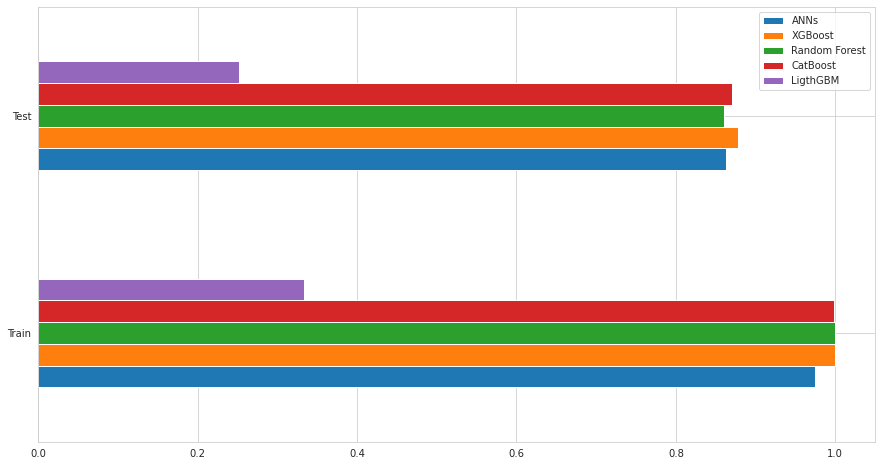%0A)

In \[ \]:

     

In \[ \]:

     

In \[ \]: